In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib



In [2]:
df=pd.read_csv(r"D:\crime rate prediction\newtrial - Sheet 1 - 01_District_wise_crim 2.csv" , sep=',')
df.head()

STATE/UT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  A & N ISLANDS  2001      13                  0   
1  A & N ISLANDS  2002      17                  3   
2  A & N ISLANDS  2003      21                  4   
3  A & N ISLANDS  2004      15                  1   
4  A & N ISLANDS  2005      14                  3   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                          0     3               0   
1                                          1     2               0   
2                                          1     2               0   
3                                          2    10               0   
4                                          3     4               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  \
0           3                       2   
1           2                       2   
2           2                       2   
3          10                       3   
4           4                       2   

   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  ...  ARSON  \
0                                            2  ...      4   
1                                            1  ...      2   
2                                            2  ...      8   
3                                            3  ...      9   
4                                            1  ...      6   

   HURT/GREVIOUS HURT  DOWRY DEATHS  \
0                 118             0   
1                  97             0   
2                 110             0   
3                 105             0   
4                  79             0   

   ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                                 19     
1                                                 17     
2                                                  9     
3                                                  6     
4                                                 11     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                           1                                    9   
1                           3                                    4   
2                           2                                    7   
3                           3                                    5   
4                           1                                    5   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                            0   
1                                            0                            0   
2                                            0                            0   
3                                            0                            6   
4                                            0                            3   

   OTHER IPC CRIMES  TOTAL IPC CRIMES  
0               323               658  
1               328               608  
2               318               644  
3               387               748  
4               362               682  

[5 rows x 32 columns]

In [3]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.upper()
print(df.columns)

Index(['STATE/UT', 'YEAR', 'MURDER', 'ATTEMPT_TO_MURDER',
       'CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER', 'RAPE', 'CUSTODIAL_RAPE',
       'OTHER_RAPE', 'KIDNAPPING_&_ABDUCTION',
       'KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS',
       'KIDNAPPING_AND_ABDUCTION_OF_OTHERS', 'DACOITY',
       'PREPARATION_AND_ASSEMBLY_FOR_DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO_THEFT', 'OTHER_THEFT', 'RIOTS', 'CRIMINAL_BREACH_OF_TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS_HURT',
       'DOWRY_DEATHS', 'ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY',
       'INSULT_TO_MODESTY_OF_WOMEN', 'CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES',
       'IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES',
       'CAUSING_DEATH_BY_NEGLIGENCE', 'OTHER_IPC_CRIMES', 'TOTAL_IPC_CRIMES'],
      dtype='object')


In [4]:
df.isnull().values.sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 32 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             420 non-null    object
 1   YEAR                                                 420 non-null    int64 
 2   MURDER                                               420 non-null    int64 
 3   ATTEMPT_TO_MURDER                                    420 non-null    int64 
 4   CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER            420 non-null    int64 
 5   RAPE                                                 420 non-null    int64 
 6   CUSTODIAL_RAPE                                       420 non-null    int64 
 7   OTHER_RAPE                                           420 non-null    int64 
 8   KIDNAPPING_&_ABDUCTION                               420 non-null    int64 
 9  

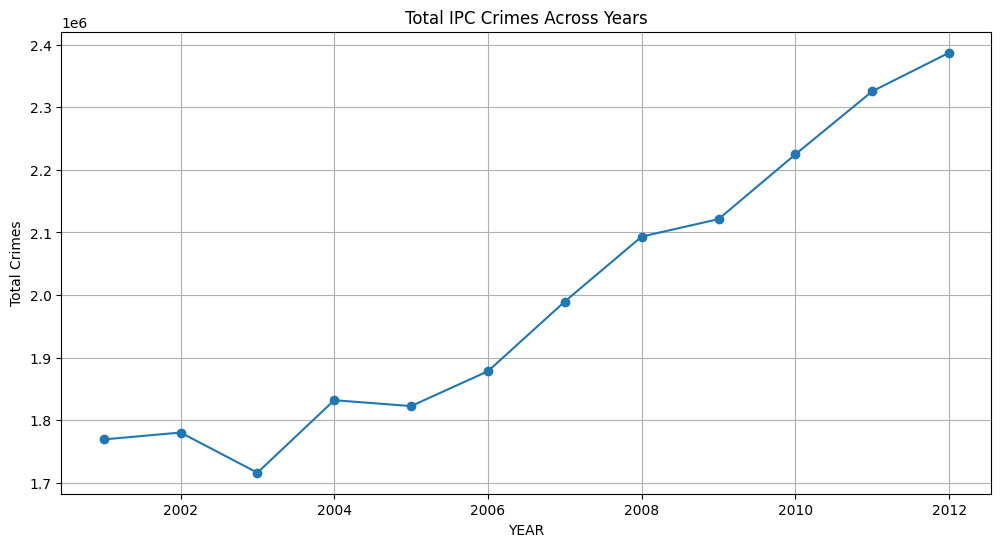

In [6]:
plt.figure(figsize=(12, 6))
df.groupby('YEAR')['TOTAL_IPC_CRIMES'].sum().plot(marker='o')
plt.title("Total IPC Crimes Across Years")
plt.ylabel("Total Crimes")
plt.grid()
plt.show()

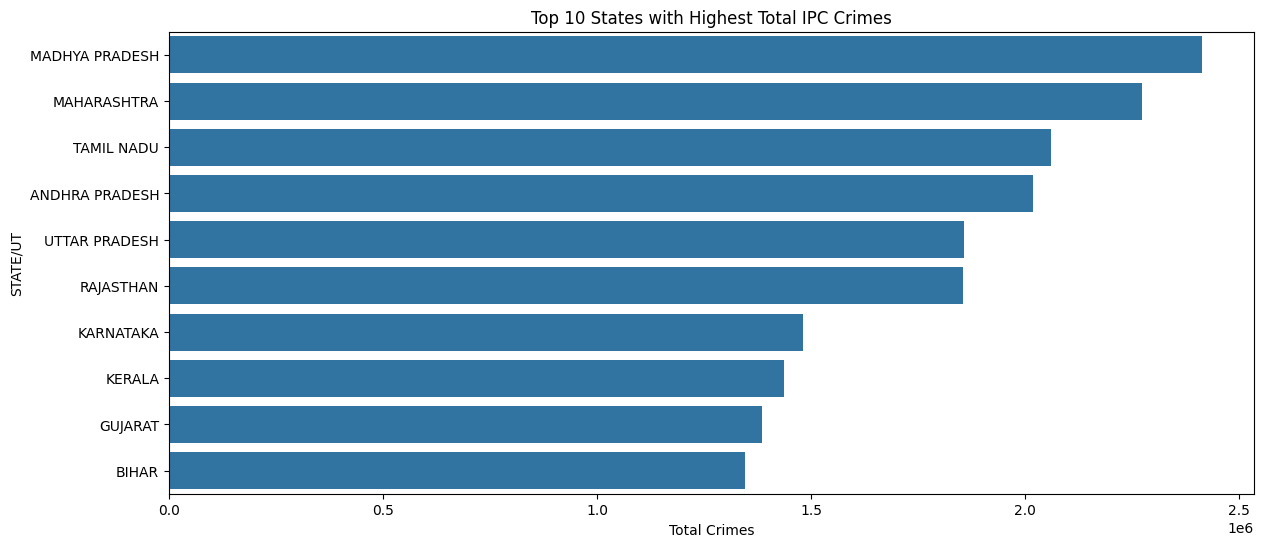

In [7]:
plt.figure(figsize=(14, 6))
top_states = df.groupby('STATE/UT')['TOTAL_IPC_CRIMES'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_states.values, y=top_states.index)
plt.title("Top 10 States with Highest Total IPC Crimes")
plt.xlabel("Total Crimes")
plt.show()

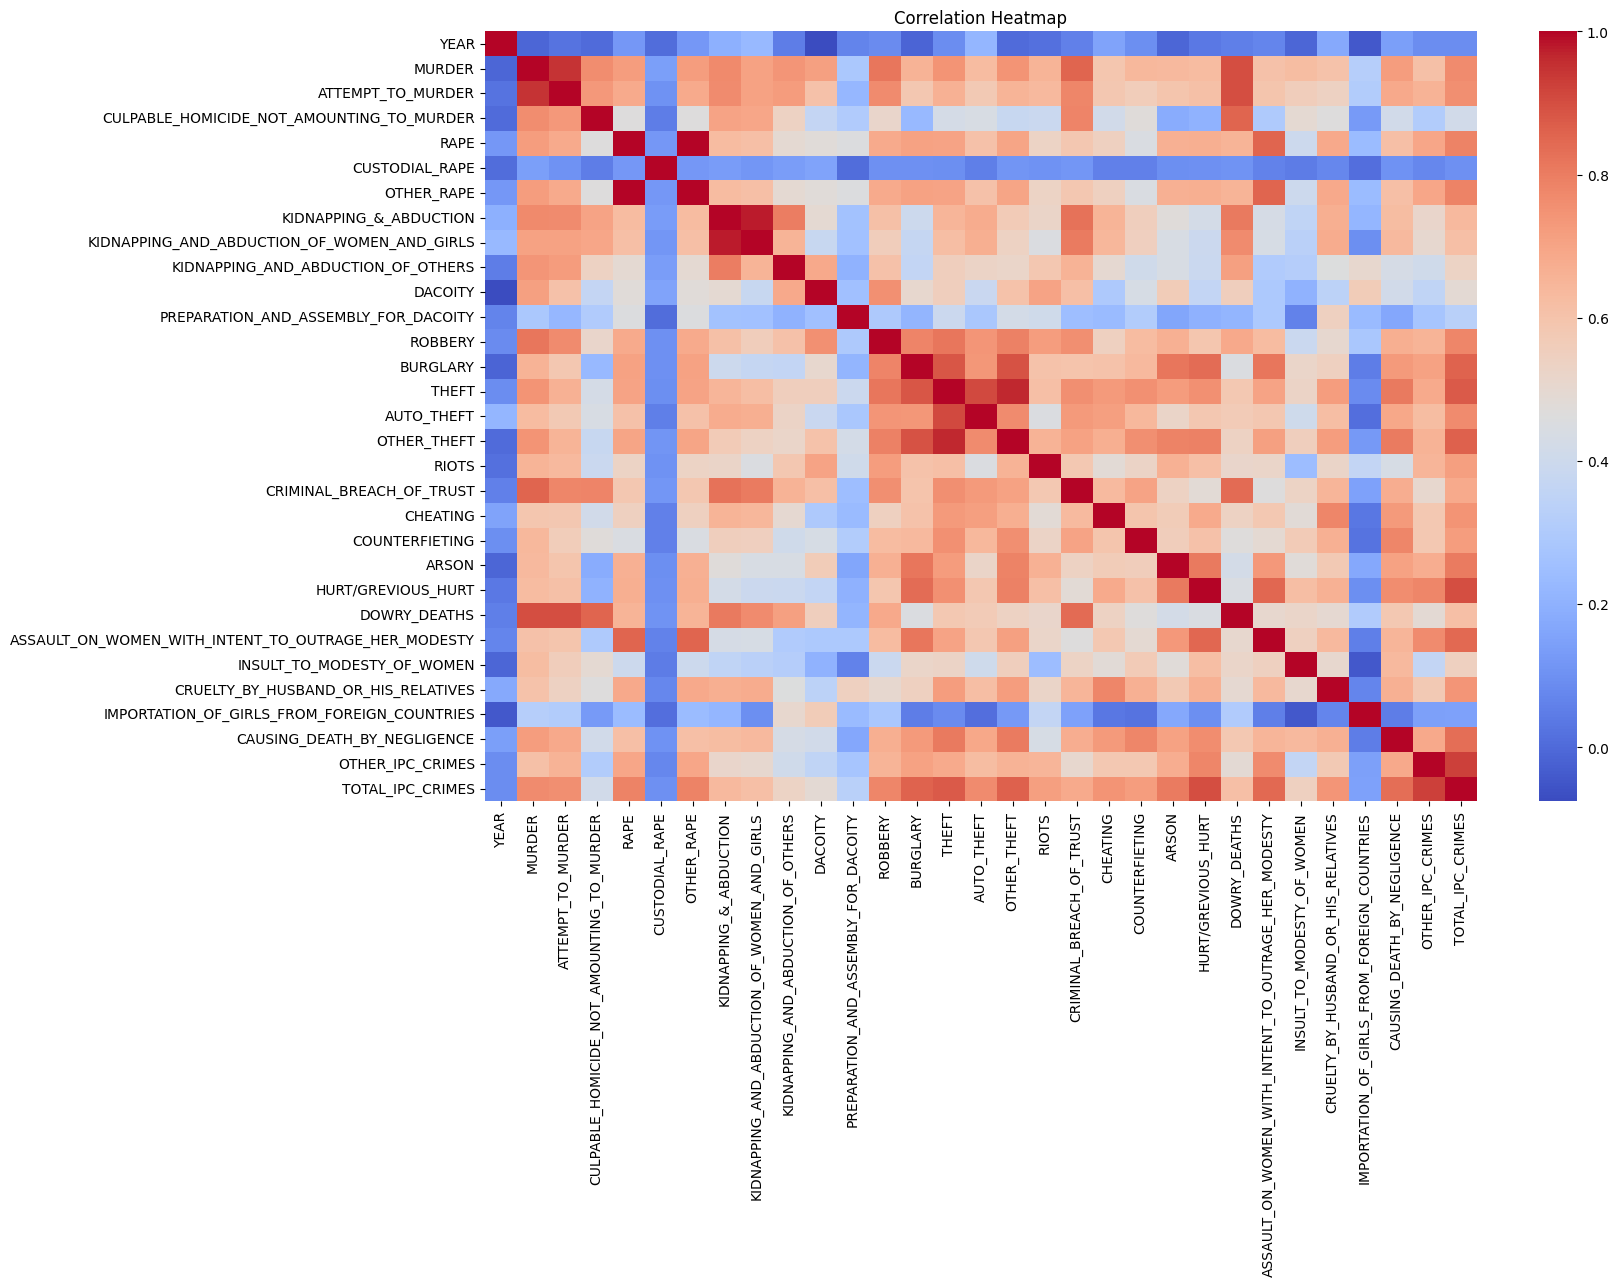

In [8]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.drop(['STATE/UT'], axis=1).corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [4]:
features = df.drop(columns=['STATE/UT', 'TOTAL_IPC_CRIMES'])
target = df['TOTAL_IPC_CRIMES']

In [12]:
print(features)

     YEAR  MURDER  ATTEMPT_TO_MURDER  \
0    2001      13                  0   
1    2002      17                  3   
2    2003      21                  4   
3    2004      15                  1   
4    2005      14                  3   
..    ...     ...                ...   
415  2008    1811               1732   
416  2009    2068               2119   
417  2010    2398               2111   
418  2011    2109               2242   
419  2012    2252               2854   

     CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER  RAPE  CUSTODIAL_RAPE  \
0                                            0     3               0   
1                                            1     2               0   
2                                            1     2               0   
3                                            2    10               0   
4                                            3     4               0   
..                                         ...   ...             ...   
415            

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(features.shape , X_train.shape, X_test.shape)

(420, 30) (336, 30) (84, 30)


In [6]:
def evaluate_model(model, X_test, y_test, y_pred):
    print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}\n")

In [7]:
model_lr=LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
print(f"the accuracy of the model is  {round(model_lr.score(X_test,y_test)*100,2)}%")
evaluate_model(model_lr, X_test, y_test, y_pred_lr)

the accuracy of the model is  100.0%
R² Score: 1.00
MAE: 0.00
RMSE: 0.00



In [8]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f"the accuracy of the model is  {round(rf_model.score(X_test,y_test)*100,2)}%")
evaluate_model(rf_model, X_test, y_test, y_pred_rf)

the accuracy of the model is  99.24%
R² Score: 0.99
MAE: 3247.63
RMSE: 5924.76



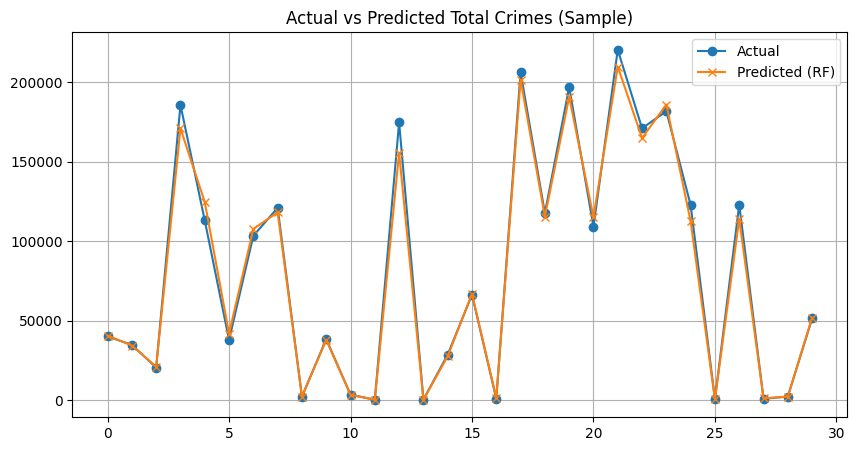

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:30], label='Actual', marker='o')
plt.plot(y_pred_rf[:30], label='Predicted (RF)', marker='x')
plt.title("Actual vs Predicted Total Crimes (Sample)")
plt.legend()
plt.grid()
plt.show()
 

In [9]:
importances = rf_model.feature_importances_
feature_names = features.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feat_imp)

OTHER_IPC_CRIMES                                       0.847746
THEFT                                                  0.040592
HURT/GREVIOUS_HURT                                     0.026335
ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY    0.025847
OTHER_THEFT                                            0.013340
CAUSING_DEATH_BY_NEGLIGENCE                            0.008798
OTHER_RAPE                                             0.008734
BURGLARY                                               0.006213
RAPE                                                   0.005467
CHEATING                                               0.002996
INSULT_TO_MODESTY_OF_WOMEN                             0.001628
YEAR                                                   0.001371
CRIMINAL_BREACH_OF_TRUST                               0.001290
AUTO_THEFT                                             0.001214
CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES                    0.001108
ROBBERY                                 

In [10]:
joblib.dump(rf_model, "crime_model.pkl")
print(" Random Forest model saved as 'crime_model.pkl'")


 Random Forest model saved as 'crime_model.pkl'


In [13]:
print("Features used in training:")
print(features.columns.tolist())
print("Number of features:", len(features.columns))


Features used in training:
['YEAR', 'MURDER', 'ATTEMPT_TO_MURDER', 'CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER', 'RAPE', 'CUSTODIAL_RAPE', 'OTHER_RAPE', 'KIDNAPPING_&_ABDUCTION', 'KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS', 'KIDNAPPING_AND_ABDUCTION_OF_OTHERS', 'DACOITY', 'PREPARATION_AND_ASSEMBLY_FOR_DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT', 'AUTO_THEFT', 'OTHER_THEFT', 'RIOTS', 'CRIMINAL_BREACH_OF_TRUST', 'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS_HURT', 'DOWRY_DEATHS', 'ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY', 'INSULT_TO_MODESTY_OF_WOMEN', 'CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES', 'IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES', 'CAUSING_DEATH_BY_NEGLIGENCE', 'OTHER_IPC_CRIMES']
Number of features: 30


In [12]:
input_data = {
    'YEAR': 2019,
    'MURDER': 45,
    'ATTEMPT_TO_MURDER': 60,
    'CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER': 5,
    'RAPE': 120,
    'CUSTODIAL_RAPE': 0,
    'OTHER_RAPE': 118,
    'KIDNAPPING_&_ABDUCTION': 200,
    'KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS': 150,
    'KIDNAPPING_AND_ABDUCTION_OF_OTHERS': 50,
    'DACOITY': 10,
    'PREPARATION_AND_ASSEMBLY_FOR_DACOITY': 2,
    'ROBBERY': 25,
    'BURGLARY': 35,
    'THEFT': 400,
    'AUTO_THEFT': 180,
    'OTHER_THEFT': 220,
    'RIOTS': 60,
    'CRIMINAL_BREACH_OF_TRUST': 18,
    'CHEATING': 75,
    'COUNTERFIETING': 5,
    'ARSON': 8,
    'HURT/GREVIOUS_HURT': 95,
    'DOWRY_DEATHS': 10,
    'ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY': 130,
    'INSULT_TO_MODESTY_OF_WOMEN': 25,
    'CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES': 180,
    'IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES': 1,
    'CAUSING_DEATH_BY_NEGLIGENCE': 12,
    'OTHER_IPC_CRIMES': 300
}


In [15]:
input_df = pd.DataFrame([input_data])[features.columns]  # Enforce column order
predicted_crime = rf_model.predict(input_df)[0]
print(f"🔮 Predicted IPC Crimes: {int(predicted_crime)}")

🔮 Predicted IPC Crimes: 1483


In [16]:
joblib.dump(features.columns.tolist(), "model_features.pkl")
print("features file created")

features file created


In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import joblib

# Load the dataset
df = pd.read_csv(r"D:\crime rate prediction\newtrial - Sheet 1 - 01_District_wise_crim 2.csv")

# Drop rows with missing values (optional: handle missing better if needed)
df = df.dropna()

# Features to include (exclude 'STATE/UT' and 'DISTRICT' if present)
features = [
    'YEAR',
    'MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE',
    'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
    'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS',
    'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
    'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING',
    'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
    'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN',
    'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
    'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES'
]

# Target column (can be total IPC crimes or a chosen one)
target = 'TOTAL IPC CRIMES' if 'TOTAL IPC CRIMES' in df.columns else 'OTHER IPC CRIMES'

X = df[features]
y = df[target]

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Save model and features
joblib.dump(model, "crime_model_calibrated.pkl")
joblib.dump(features, "model_features_calibrated.pkl")

print("✅ Model training complete and files saved.")


✅ Model training complete and files saved.


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load data

df = pd.read_csv(r"D:\crime rate prediction\newtrial - Sheet 1 - 01_District_wise_crim 2.csv")

# Drop rows with missing values and non-numeric columns not needed
df = df.dropna()
df = df.drop(columns=['STATE/UT'])  # Remove non-numeric column

# Define features and target
X = df.drop(columns=['TOTAL IPC CRIMES'])
y = df['TOTAL IPC CRIMES']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"the accuracy of the model is  {round(knn.score(X_test,y_test)*100,2)}%")
evaluate_model(knn, X_test, y_test, y_pred)




the accuracy of the model is  97.52%
R² Score: 0.98
MAE: 5569.11
RMSE: 10666.44



In [12]:
joblib.dump(knn, "knn.pkl")
print("knn model file created")

knn model file created


Time Series Forecasting

08:59:14 - cmdstanpy - INFO - Chain [1] start processing
08:59:38 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


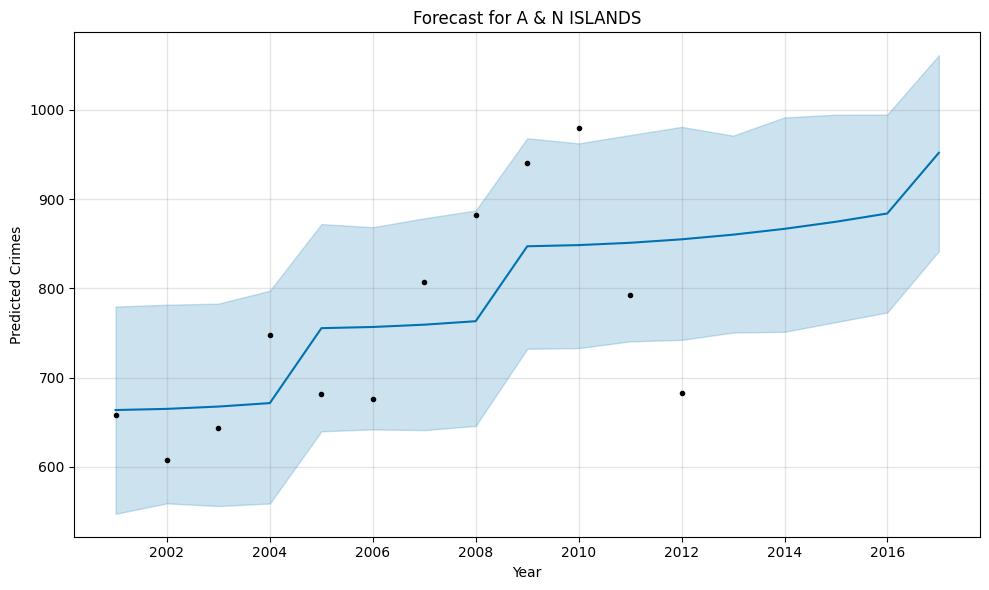

08:59:43 - cmdstanpy - INFO - Chain [1] start processing
08:59:43 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


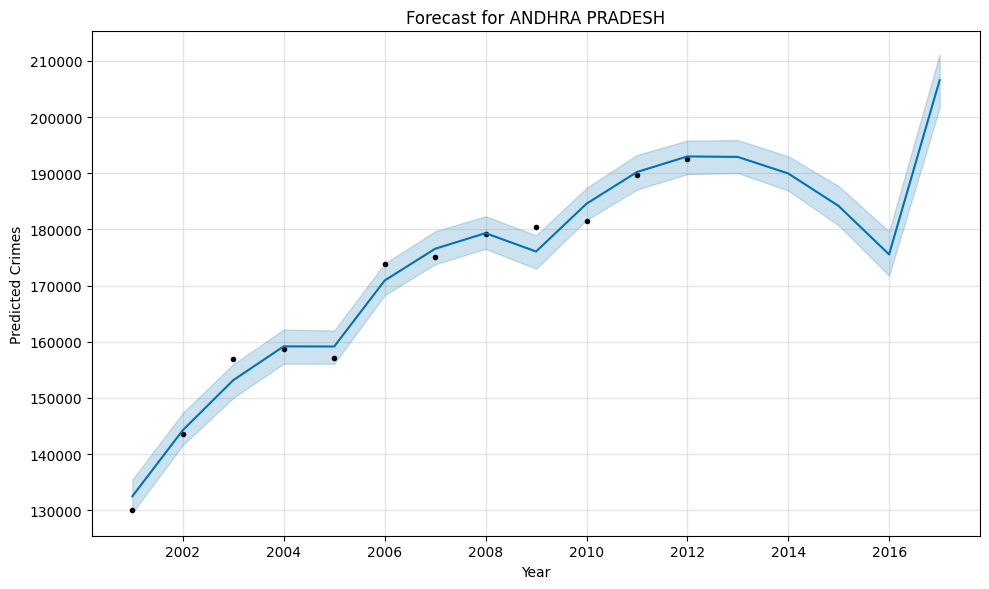

08:59:46 - cmdstanpy - INFO - Chain [1] start processing
08:59:49 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


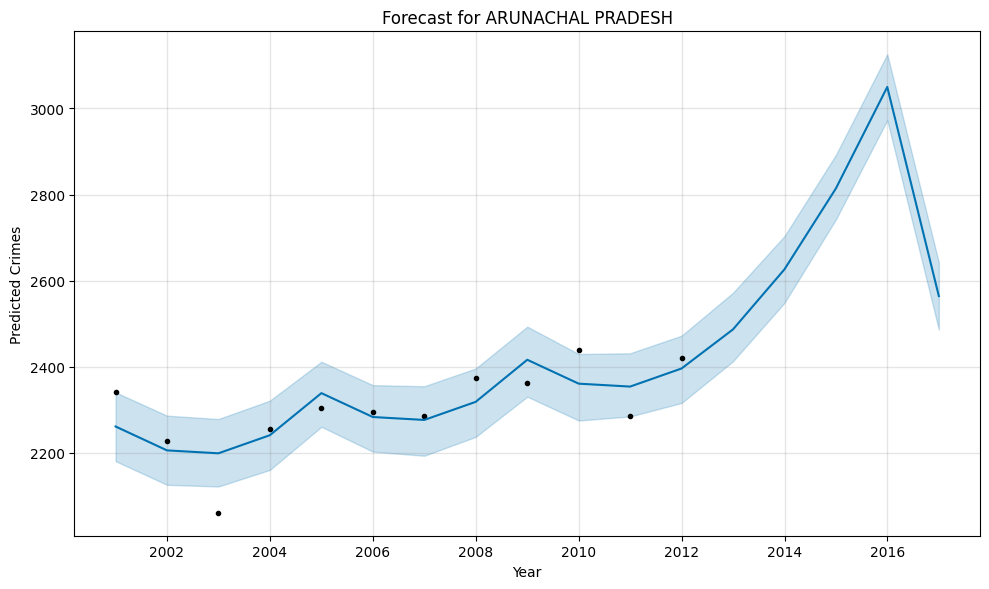

08:59:52 - cmdstanpy - INFO - Chain [1] start processing
08:59:52 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


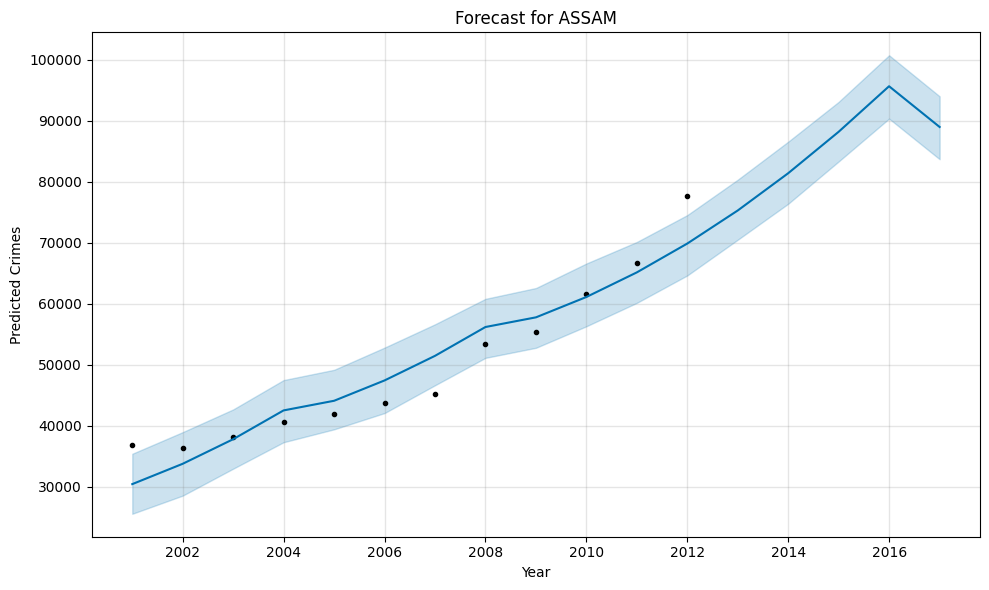

08:59:54 - cmdstanpy - INFO - Chain [1] start processing
08:59:55 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


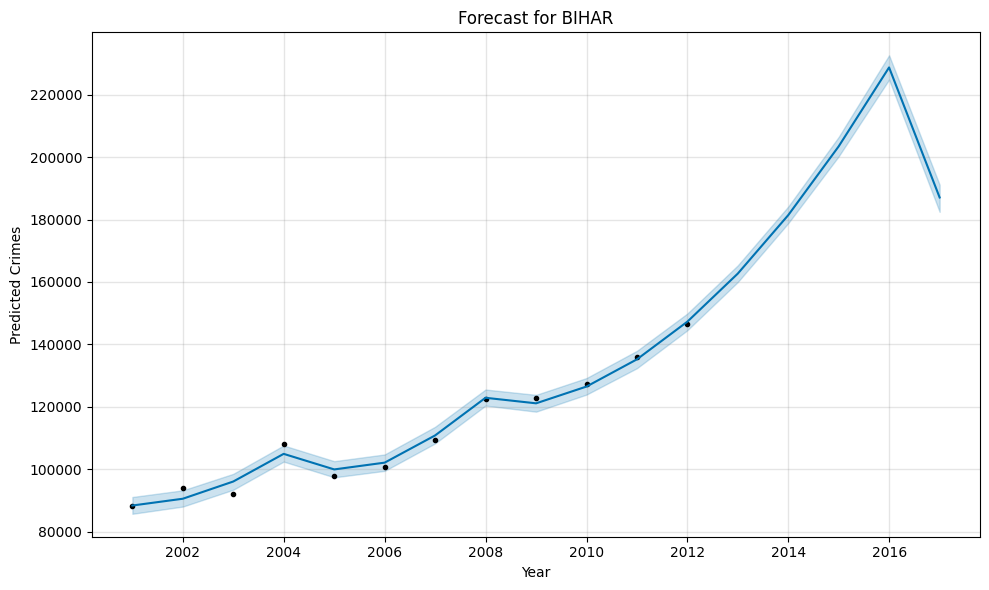

08:59:58 - cmdstanpy - INFO - Chain [1] start processing
08:59:58 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


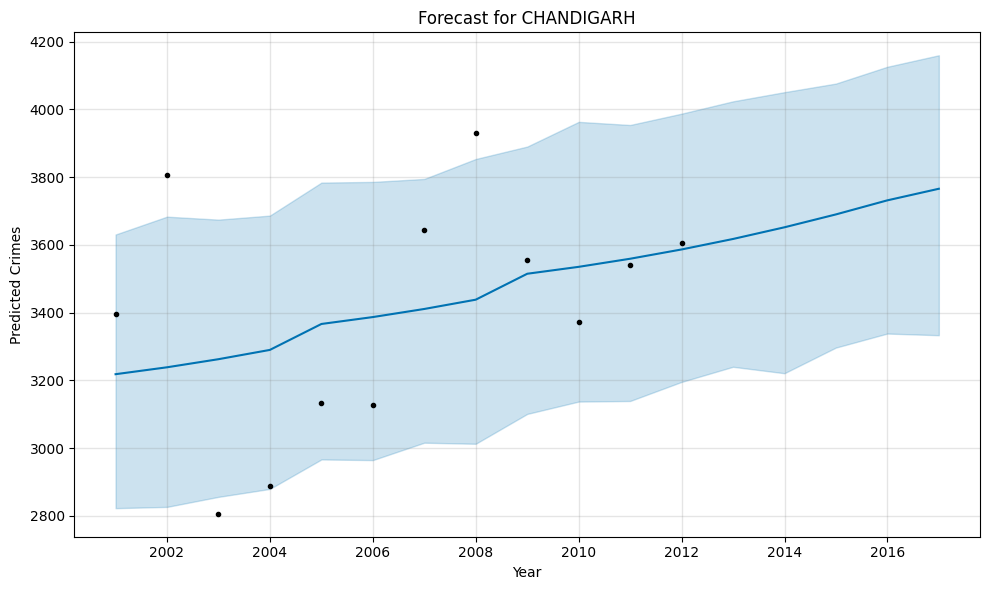

09:00:00 - cmdstanpy - INFO - Chain [1] start processing
09:00:00 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


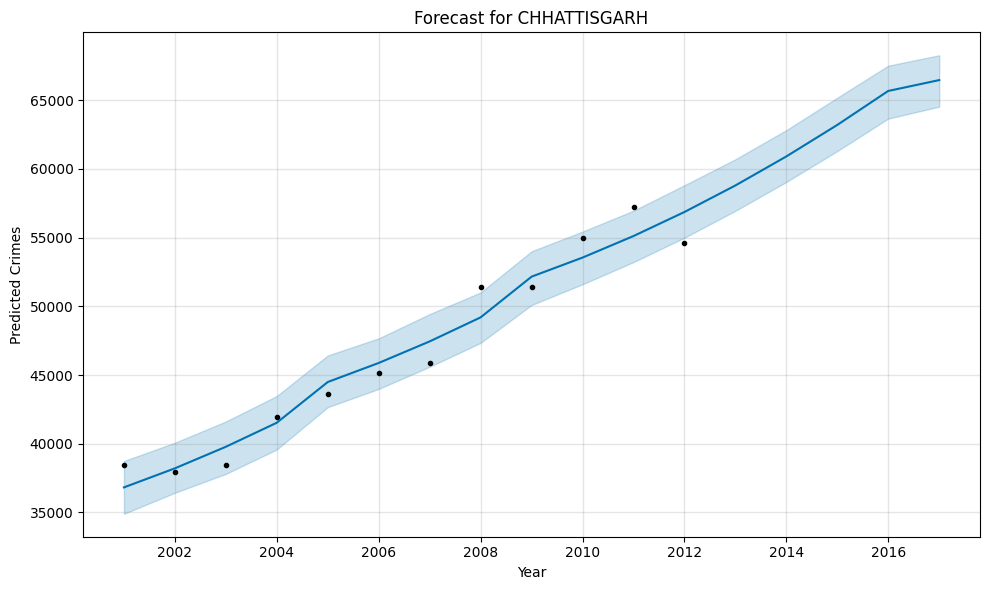

09:00:03 - cmdstanpy - INFO - Chain [1] start processing
09:00:04 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


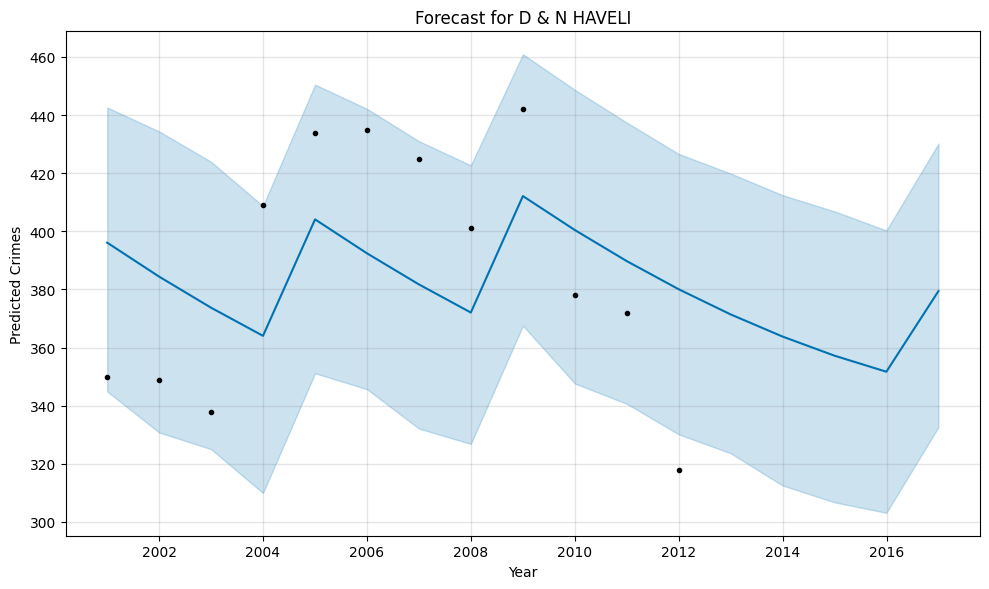

09:00:07 - cmdstanpy - INFO - Chain [1] start processing
09:00:08 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


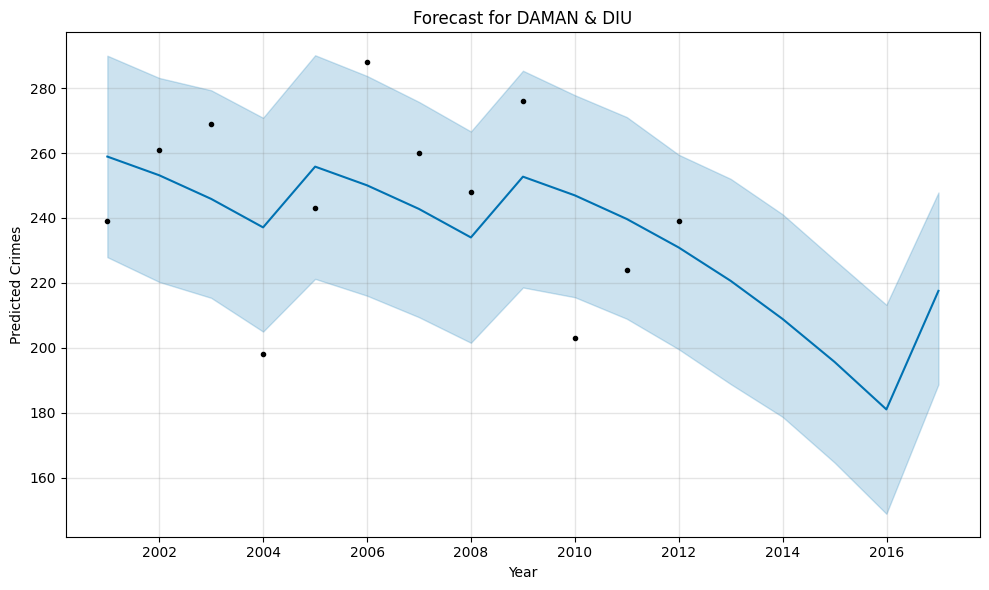

09:00:11 - cmdstanpy - INFO - Chain [1] start processing
09:00:11 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


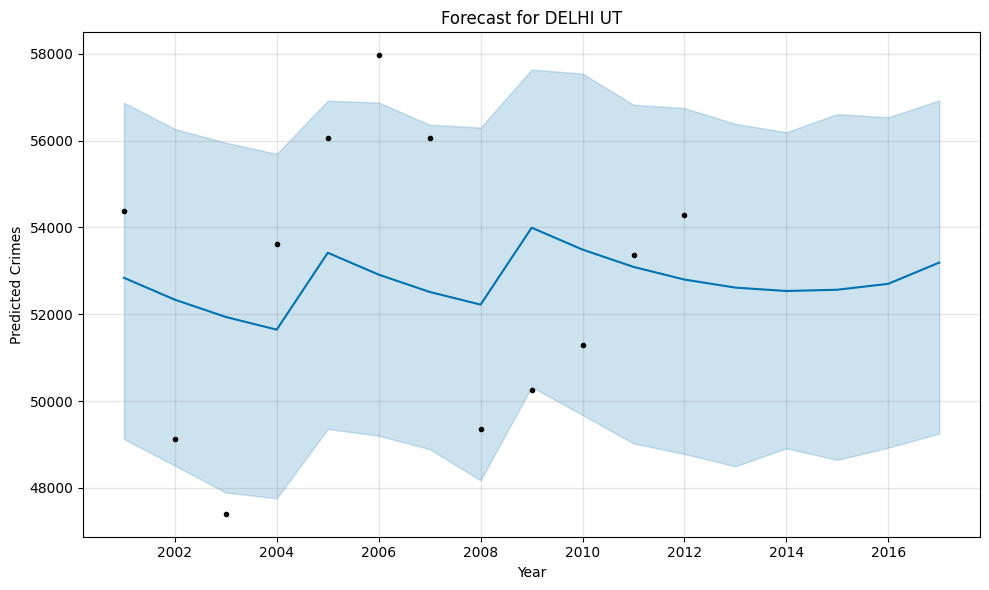

09:00:13 - cmdstanpy - INFO - Chain [1] start processing
09:00:14 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


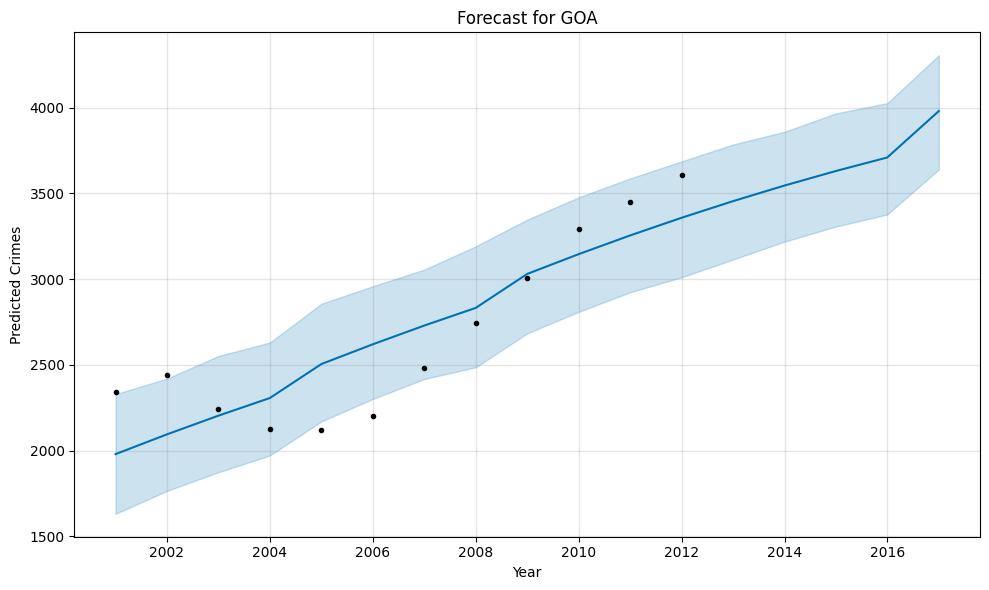

09:00:15 - cmdstanpy - INFO - Chain [1] start processing
09:00:16 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


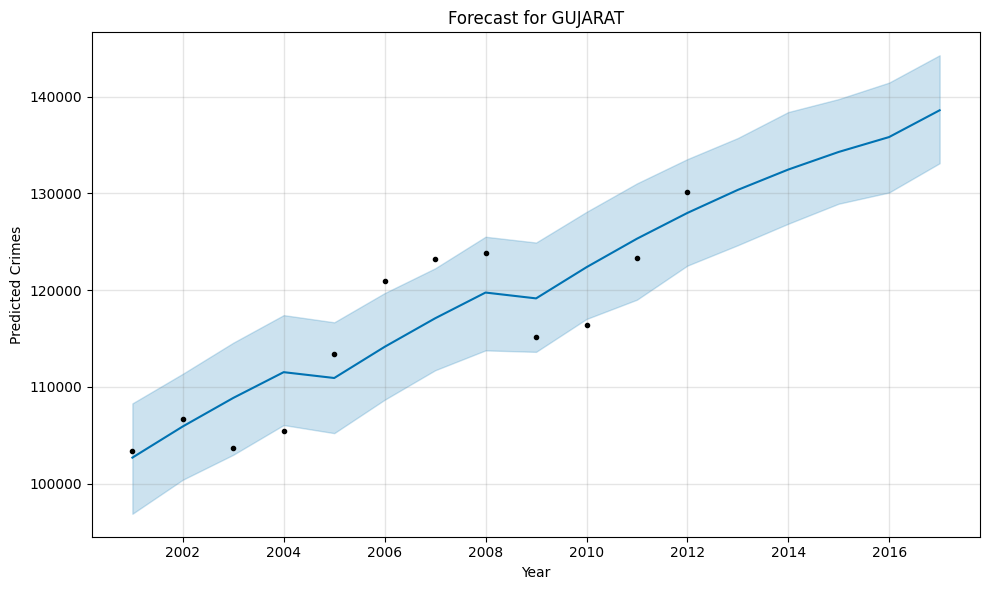

09:00:18 - cmdstanpy - INFO - Chain [1] start processing
09:00:18 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


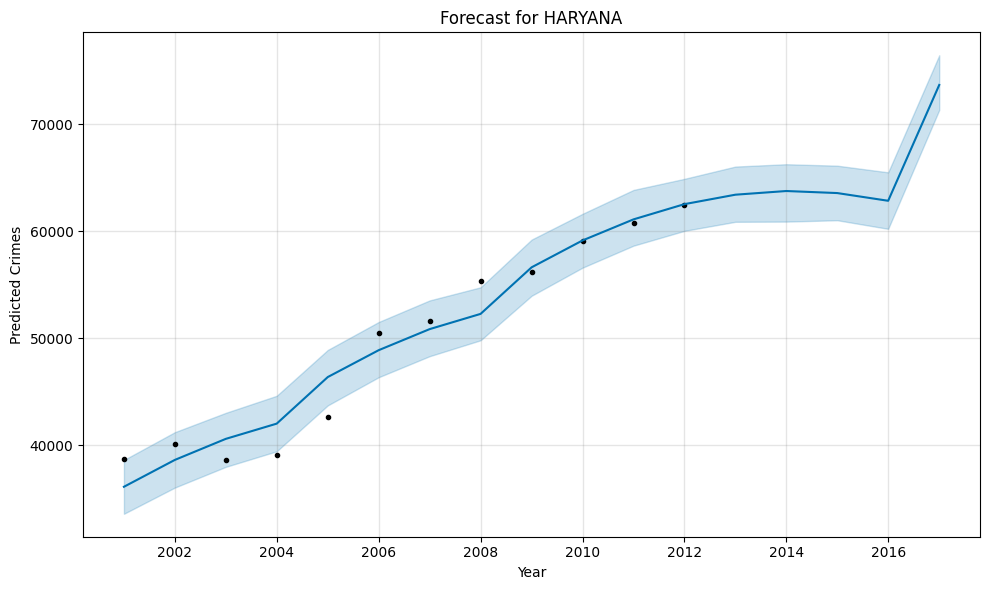

09:00:20 - cmdstanpy - INFO - Chain [1] start processing
09:00:21 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


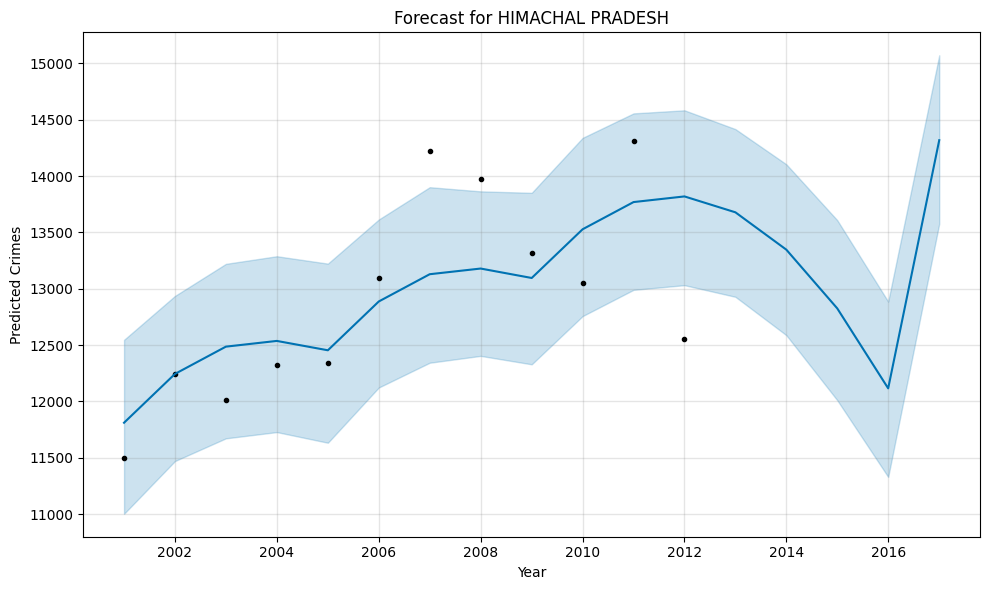

09:00:25 - cmdstanpy - INFO - Chain [1] start processing
09:00:25 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


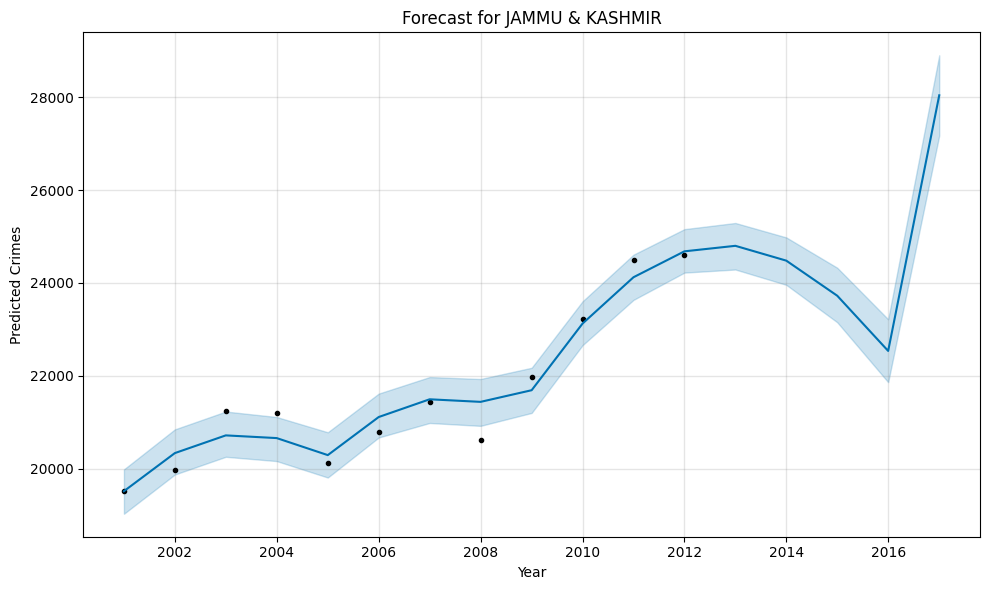

09:00:27 - cmdstanpy - INFO - Chain [1] start processing
09:00:28 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


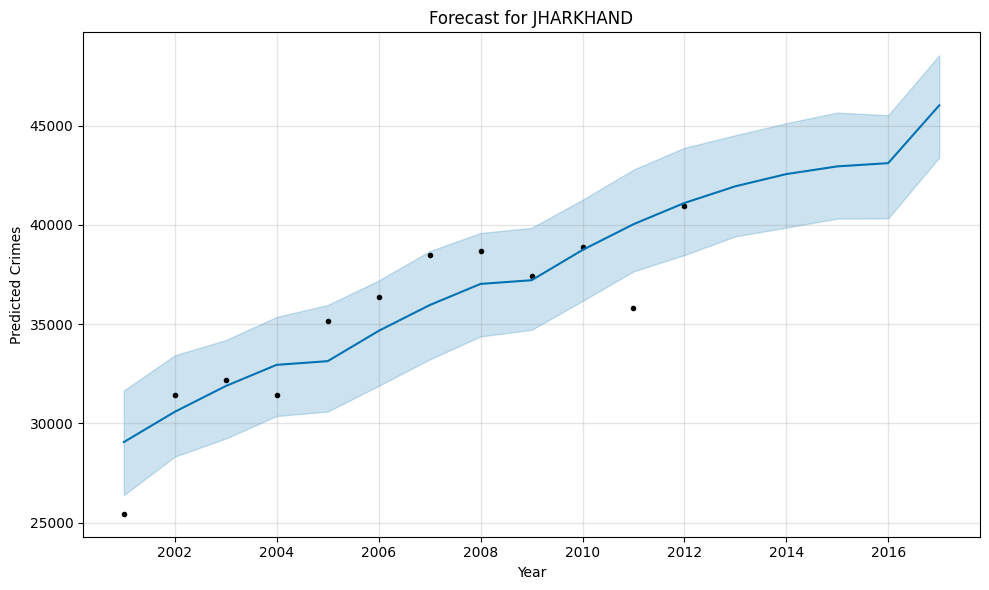

09:00:30 - cmdstanpy - INFO - Chain [1] start processing
09:00:31 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


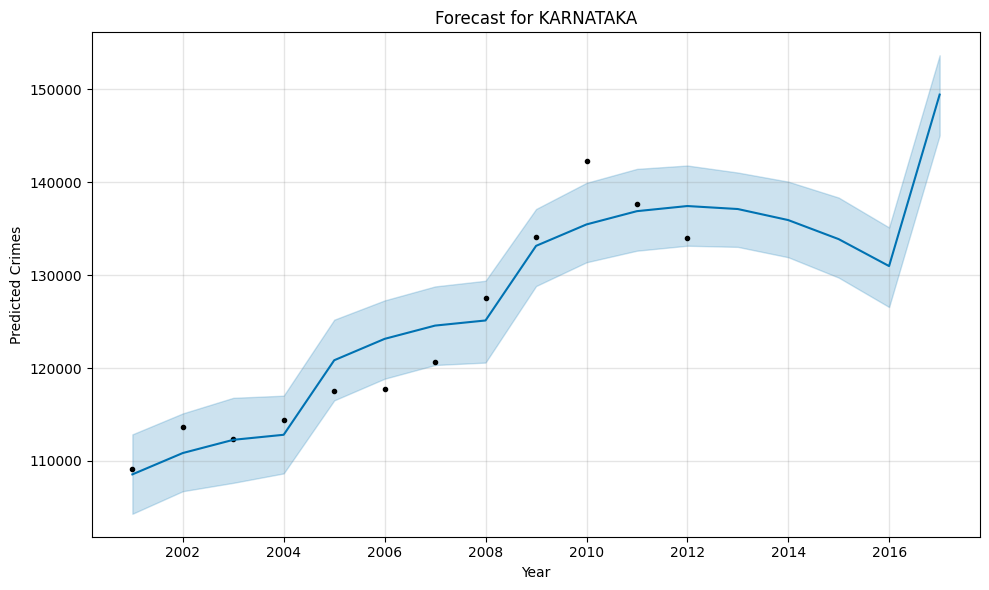

09:00:33 - cmdstanpy - INFO - Chain [1] start processing
09:00:34 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


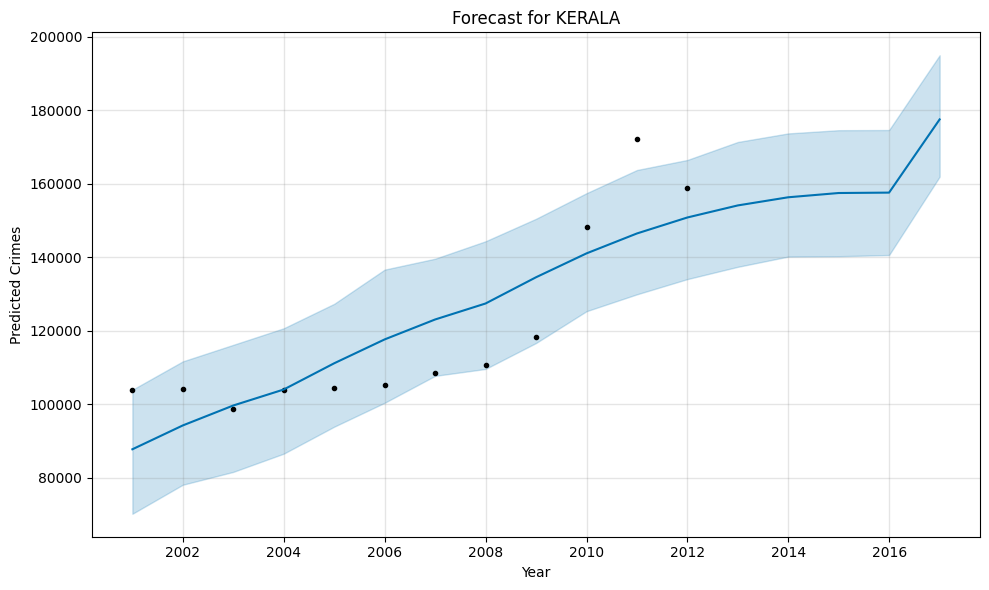

09:00:37 - cmdstanpy - INFO - Chain [1] start processing
09:00:37 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


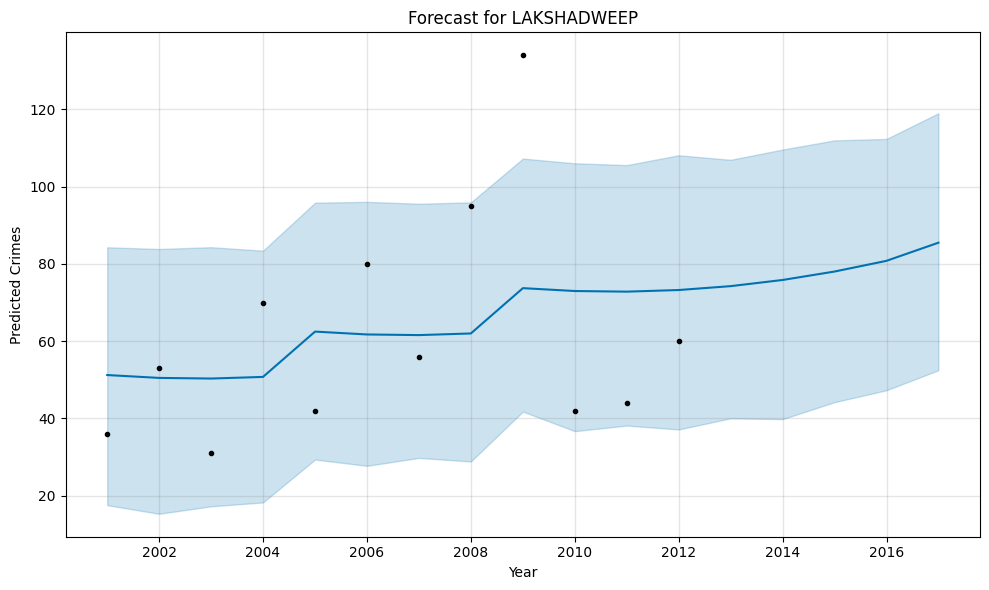

09:00:41 - cmdstanpy - INFO - Chain [1] start processing
09:00:41 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


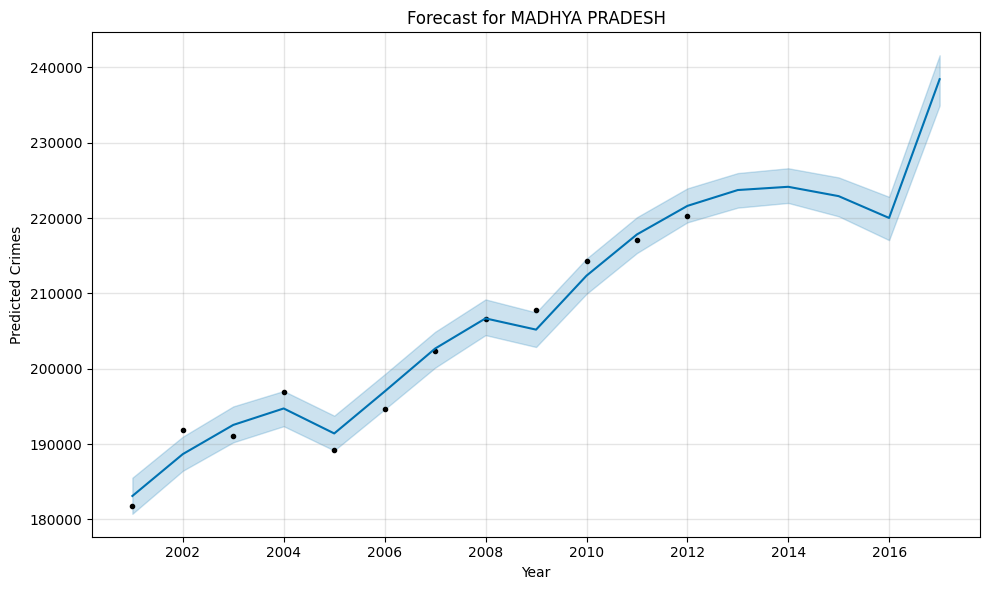

09:00:45 - cmdstanpy - INFO - Chain [1] start processing
09:00:46 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


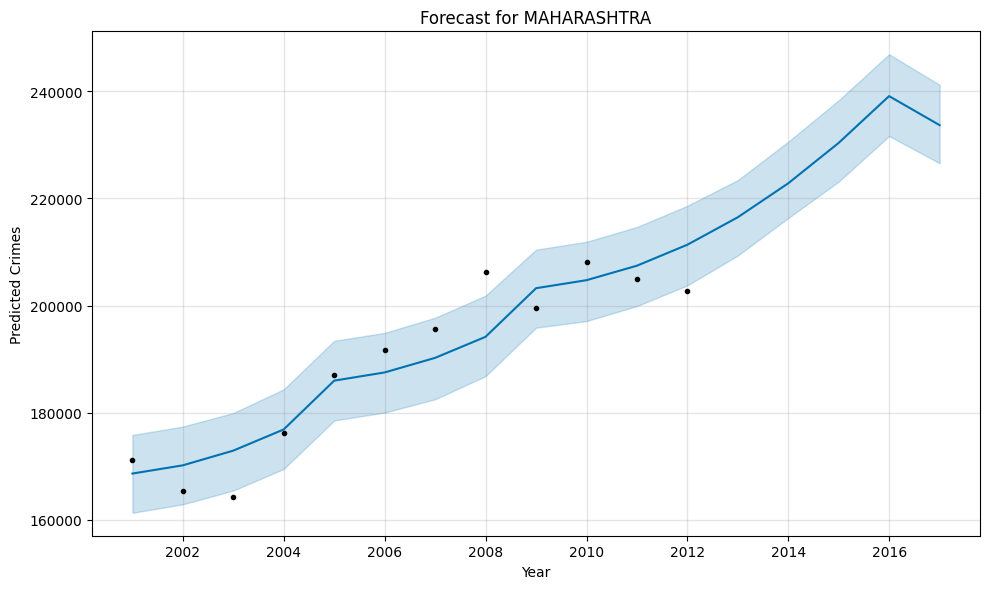

09:00:49 - cmdstanpy - INFO - Chain [1] start processing
09:00:50 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


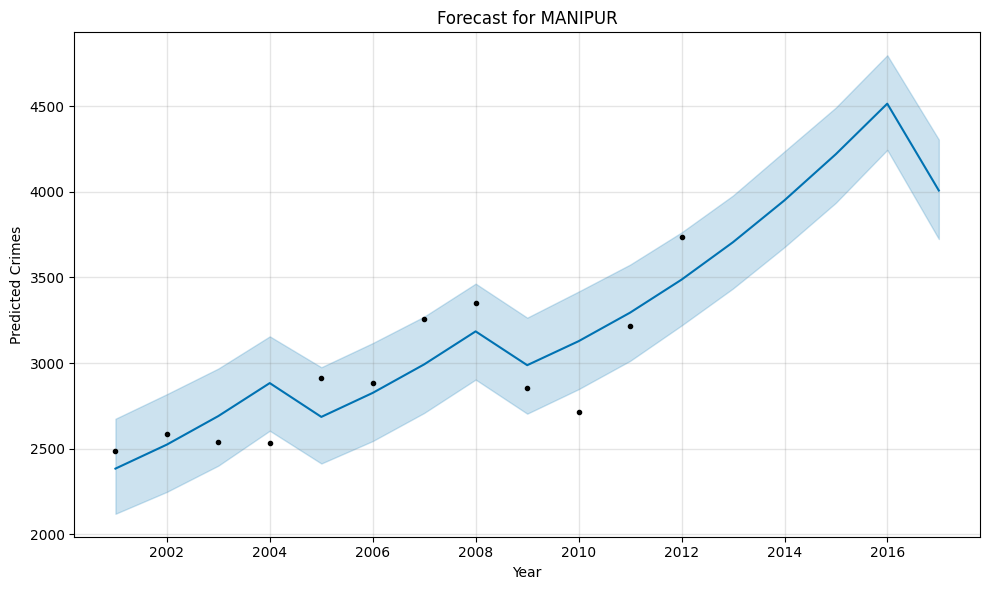

09:00:53 - cmdstanpy - INFO - Chain [1] start processing
09:00:53 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


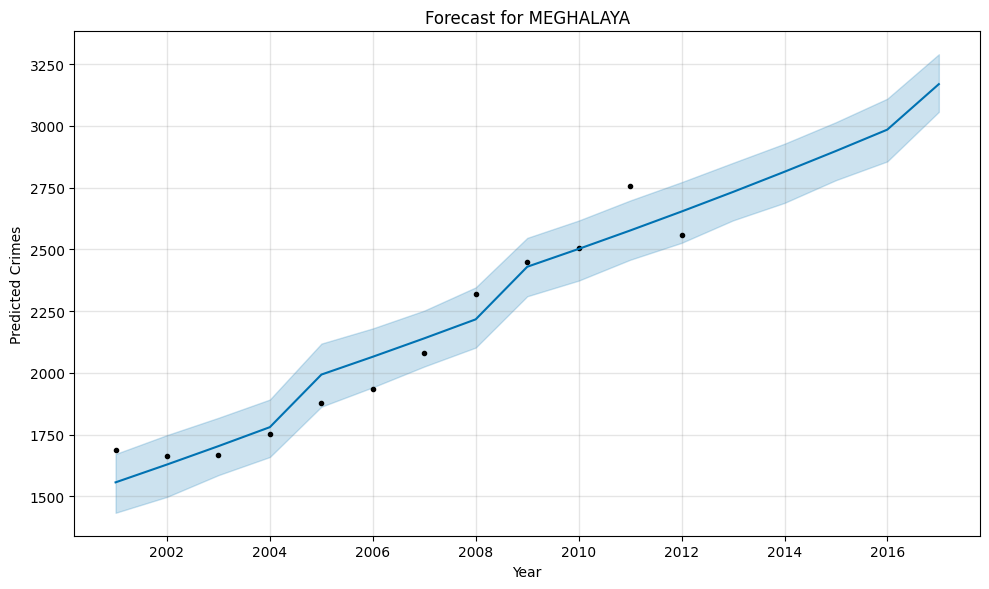

09:00:56 - cmdstanpy - INFO - Chain [1] start processing
09:00:57 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


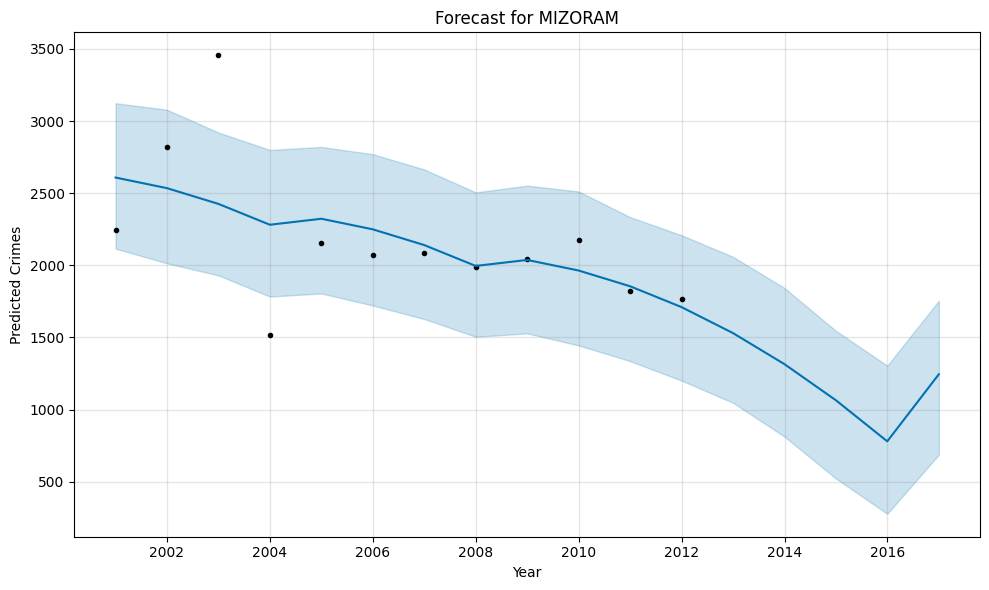

09:00:59 - cmdstanpy - INFO - Chain [1] start processing
09:00:59 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


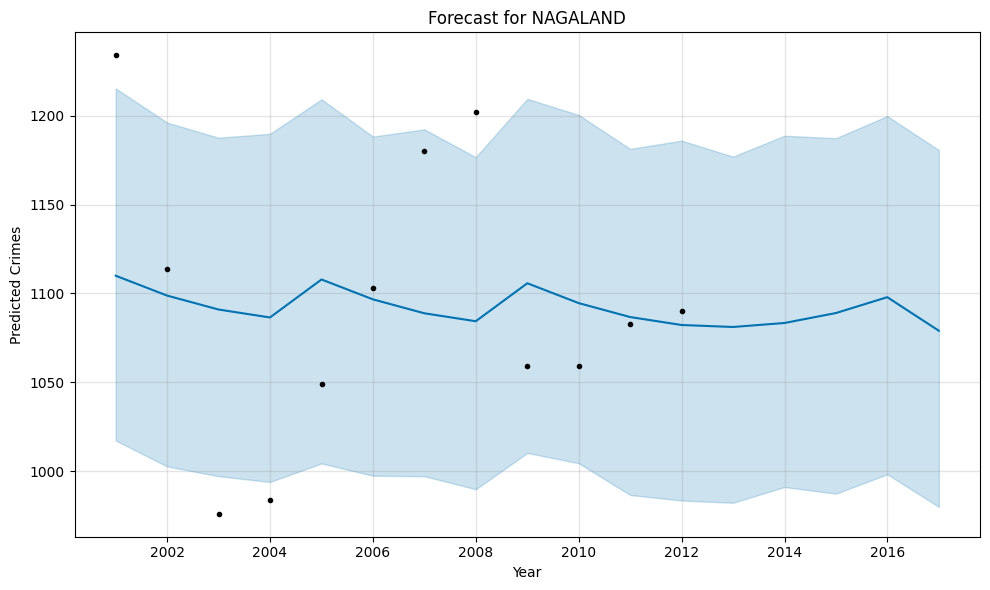

09:01:01 - cmdstanpy - INFO - Chain [1] start processing
09:01:02 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


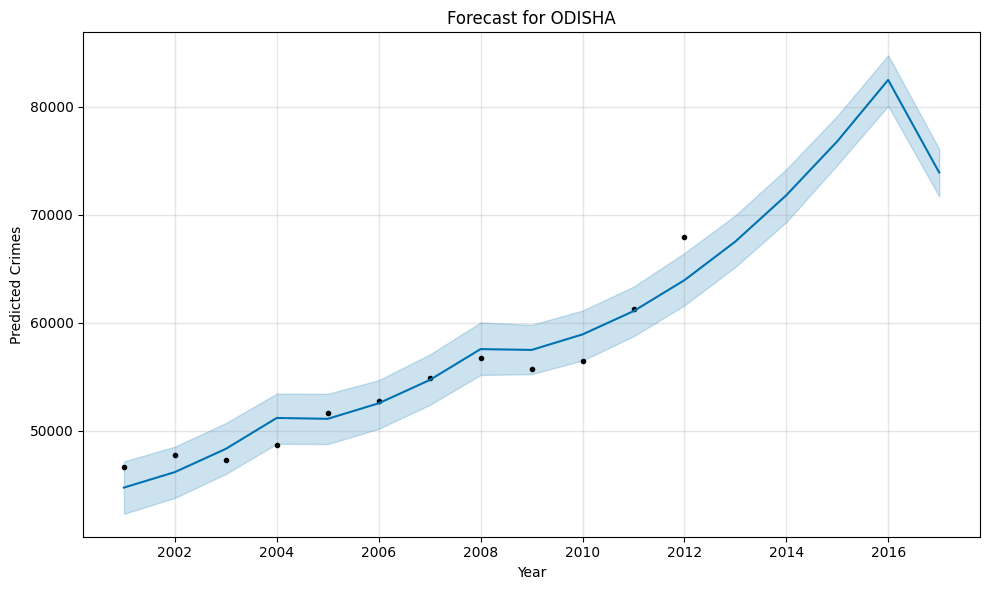

09:01:06 - cmdstanpy - INFO - Chain [1] start processing
09:01:06 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


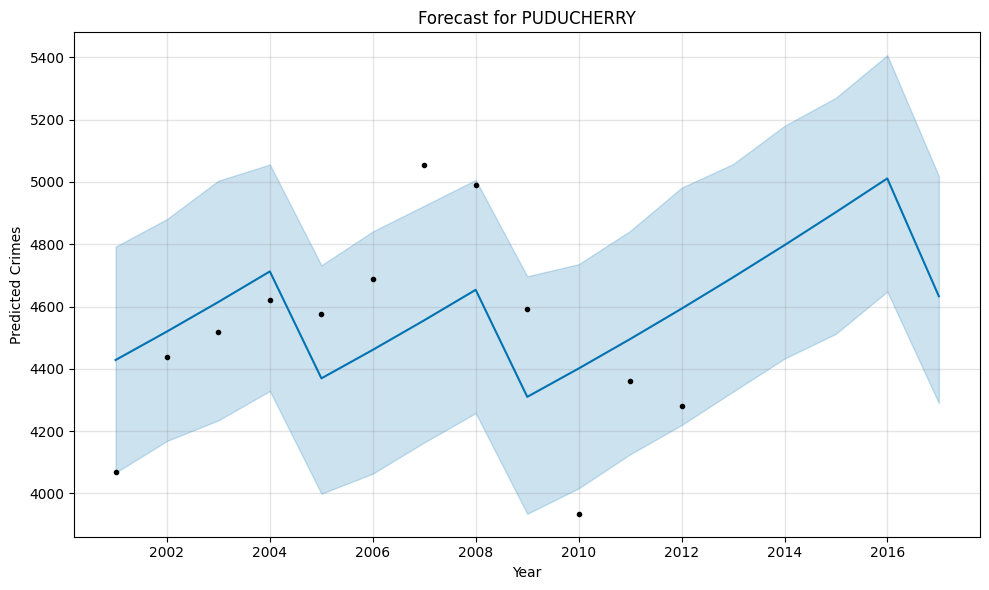

09:01:08 - cmdstanpy - INFO - Chain [1] start processing
09:01:08 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


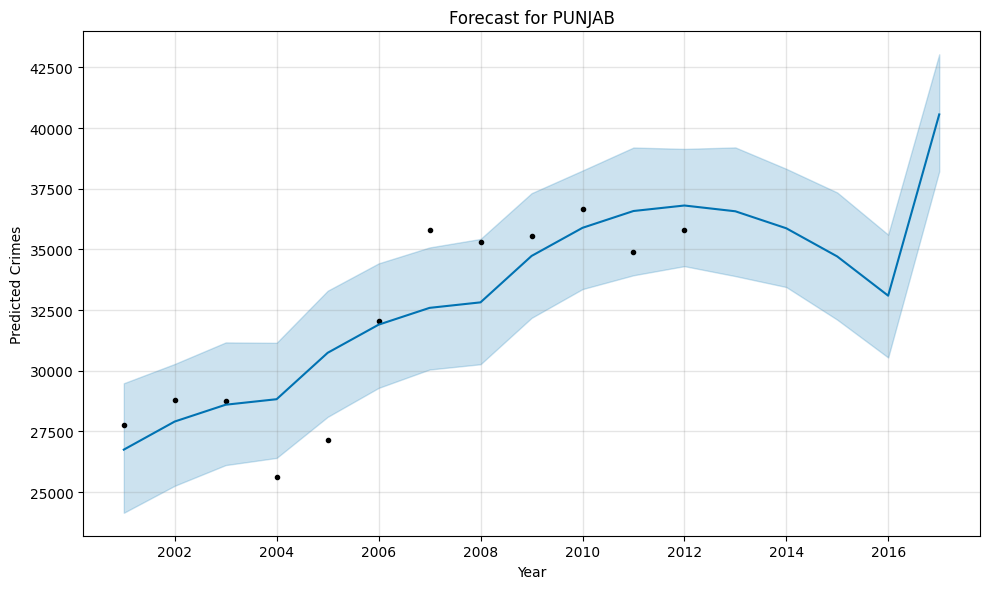

09:01:11 - cmdstanpy - INFO - Chain [1] start processing
09:01:11 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


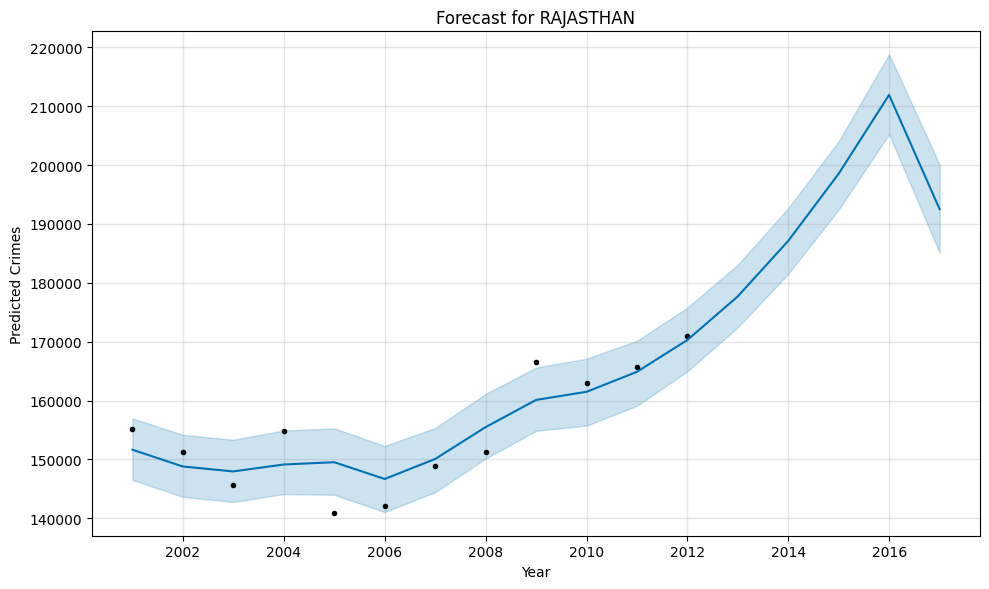

09:01:14 - cmdstanpy - INFO - Chain [1] start processing
09:01:15 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


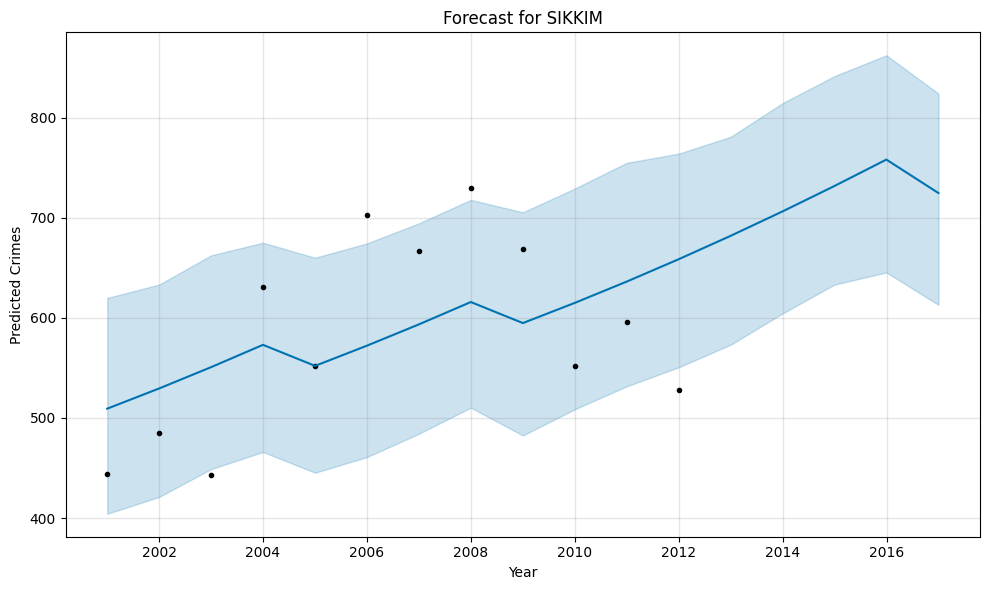

09:01:18 - cmdstanpy - INFO - Chain [1] start processing
09:01:19 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


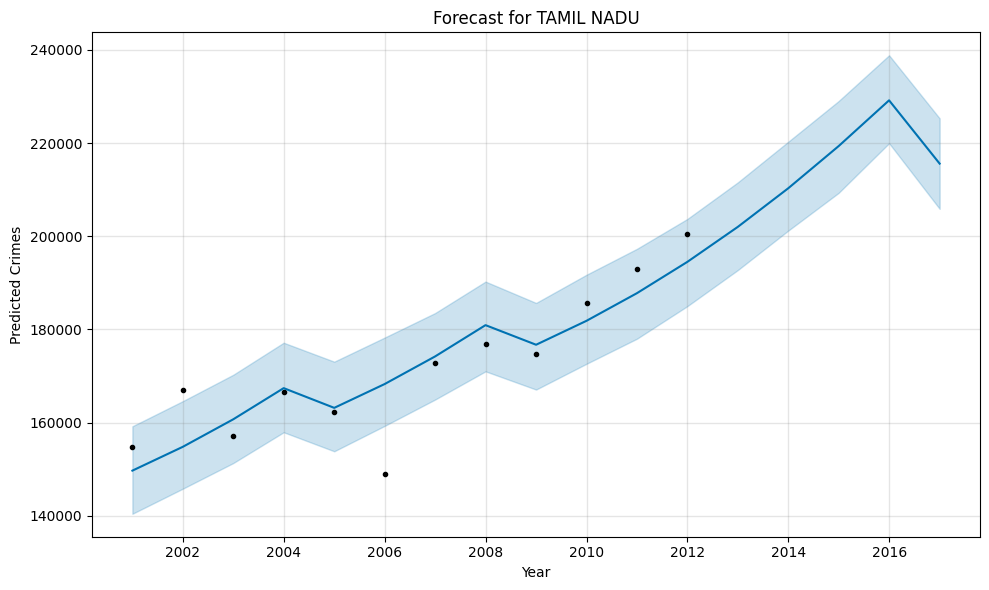

09:01:22 - cmdstanpy - INFO - Chain [1] start processing
09:01:23 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


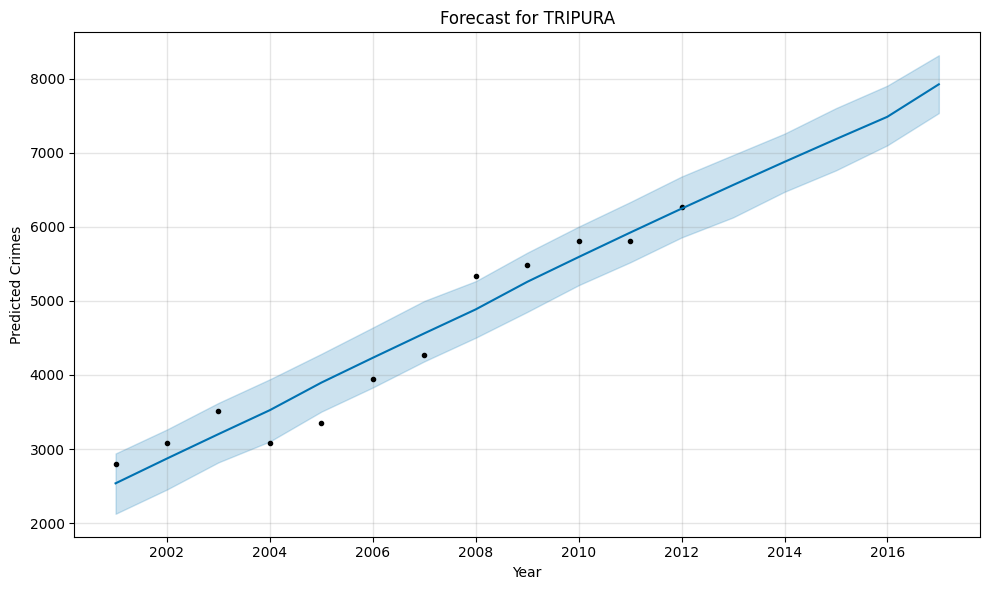

09:01:26 - cmdstanpy - INFO - Chain [1] start processing
09:01:27 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


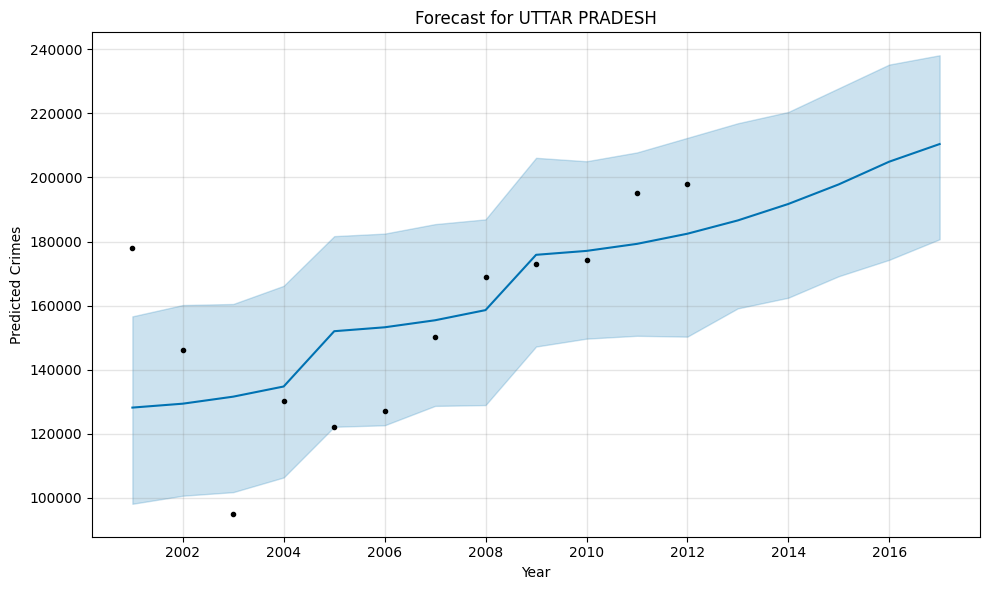

09:01:29 - cmdstanpy - INFO - Chain [1] start processing
09:01:29 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


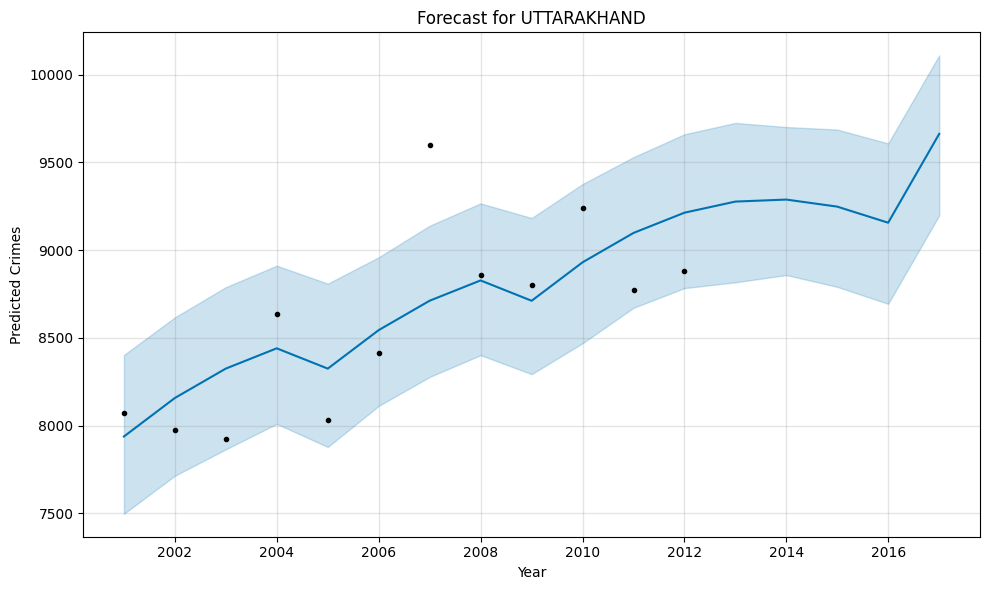

09:01:31 - cmdstanpy - INFO - Chain [1] start processing
09:01:32 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


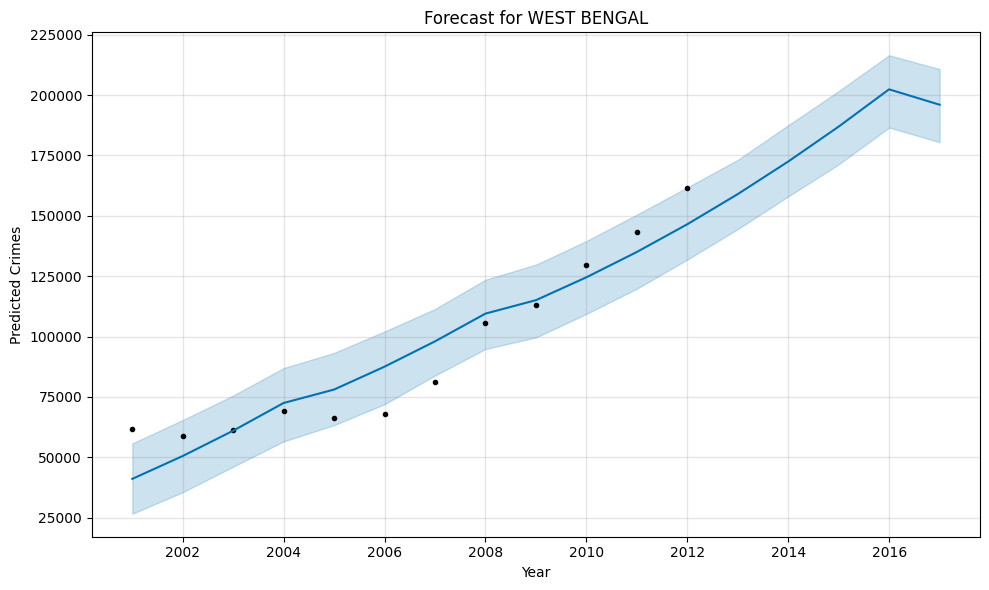

09:01:35 - cmdstanpy - INFO - Chain [1] start processing
09:01:36 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


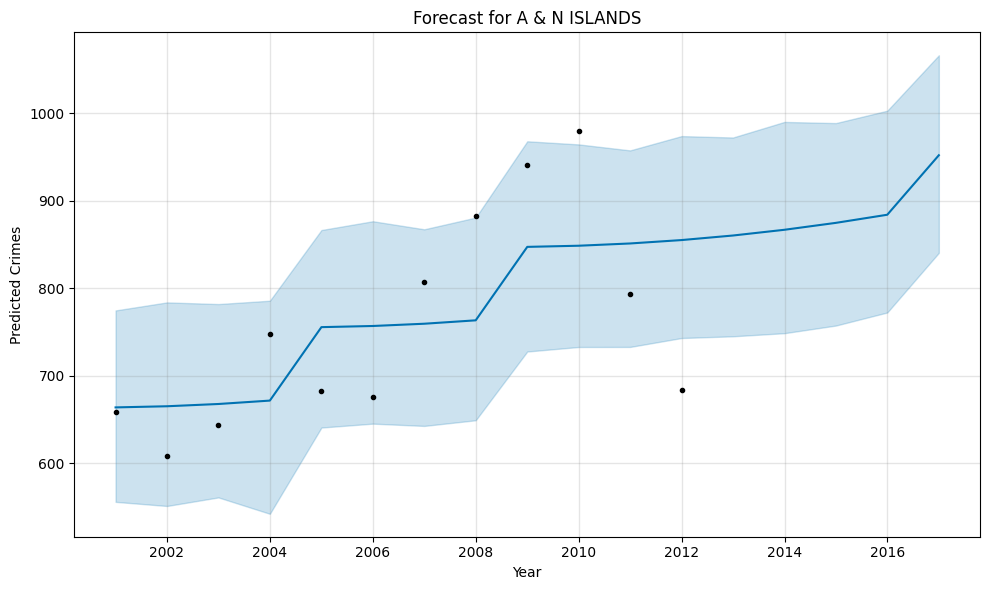

09:01:38 - cmdstanpy - INFO - Chain [1] start processing
09:01:38 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


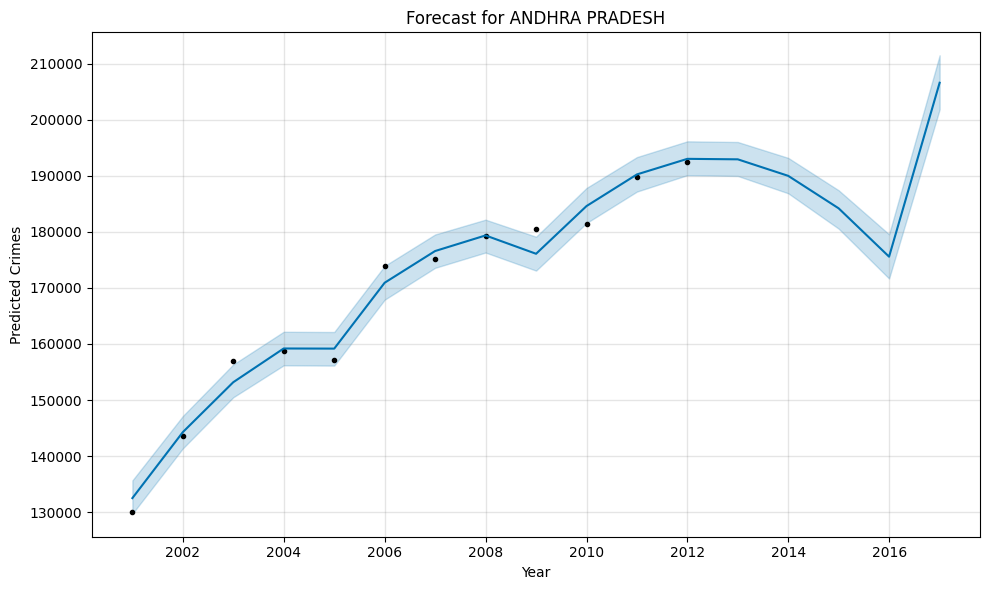

09:01:42 - cmdstanpy - INFO - Chain [1] start processing
09:01:42 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


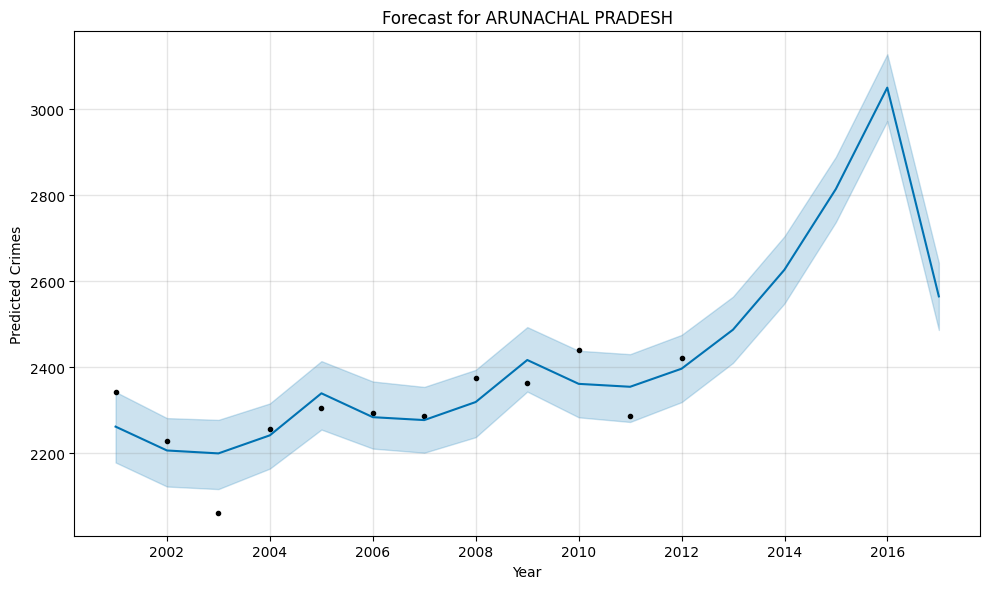

09:01:44 - cmdstanpy - INFO - Chain [1] start processing
09:01:45 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


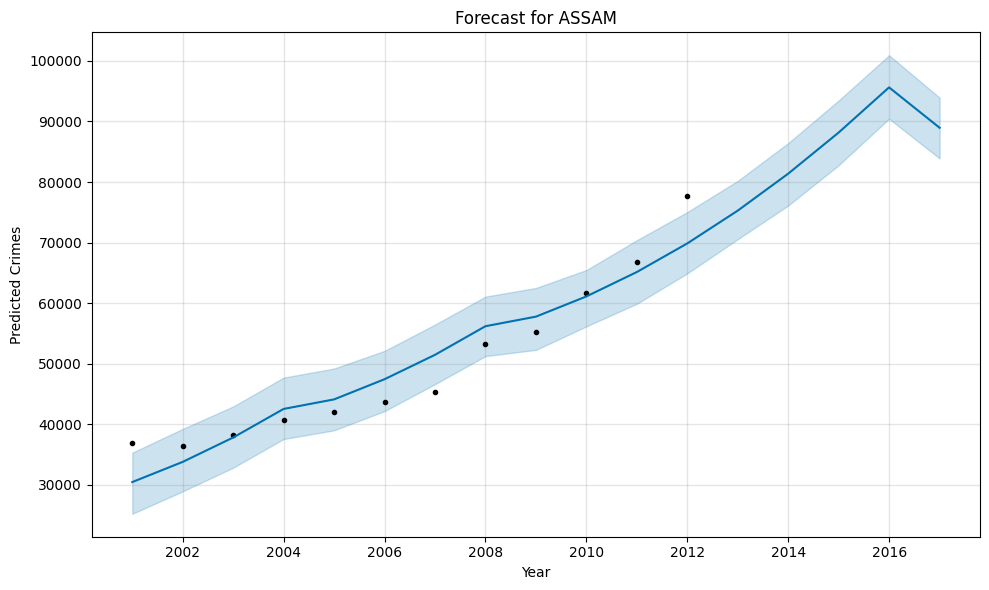

09:01:47 - cmdstanpy - INFO - Chain [1] start processing
09:01:48 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


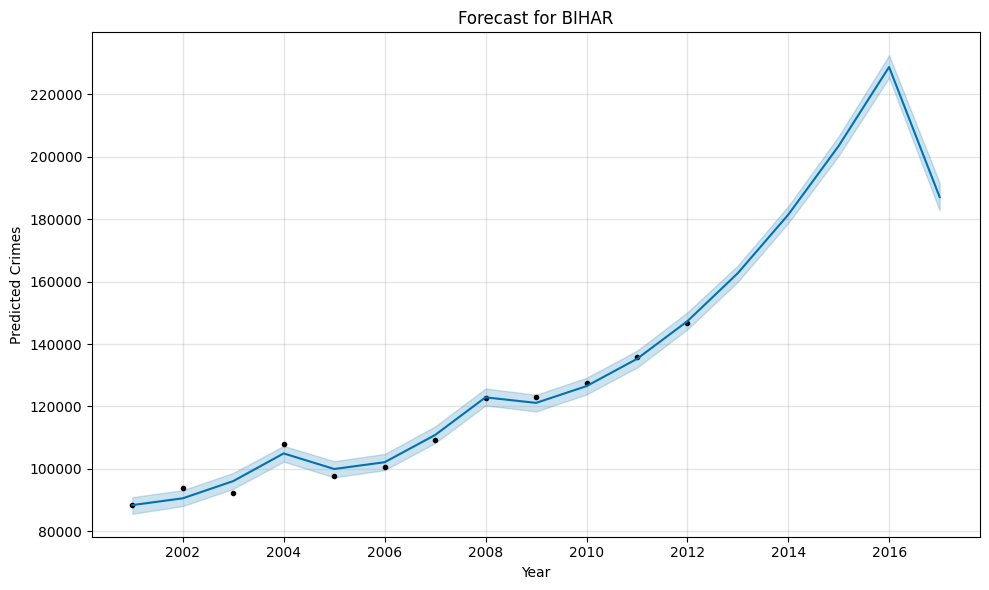

09:01:51 - cmdstanpy - INFO - Chain [1] start processing
09:01:51 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


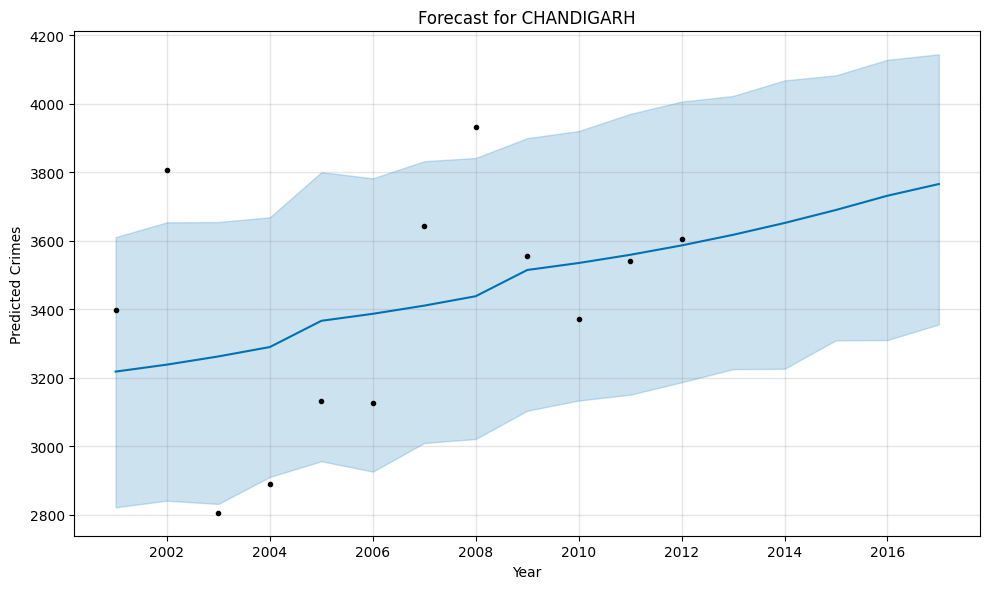

09:01:54 - cmdstanpy - INFO - Chain [1] start processing
09:01:56 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


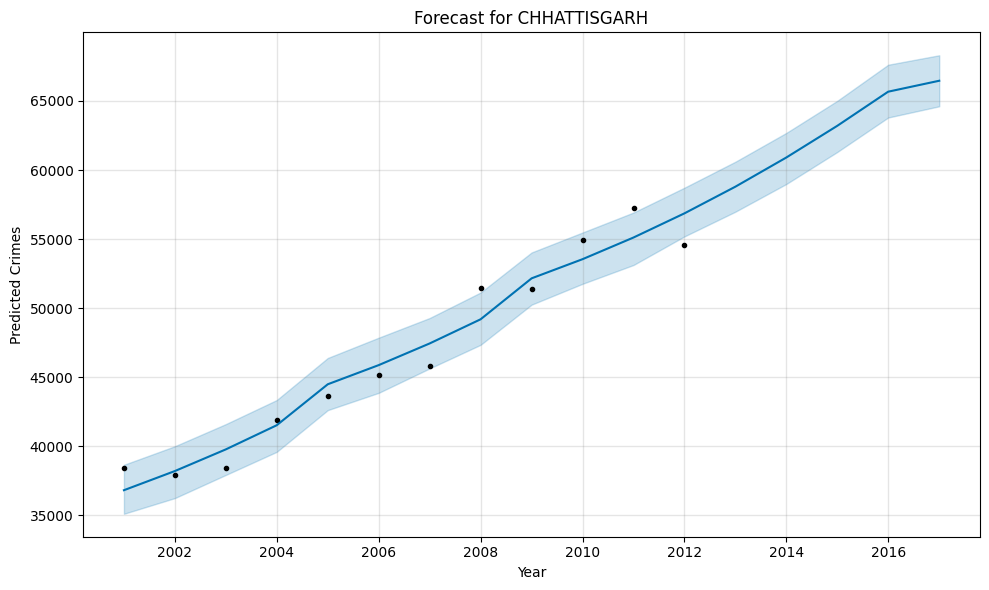

09:01:59 - cmdstanpy - INFO - Chain [1] start processing
09:01:59 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


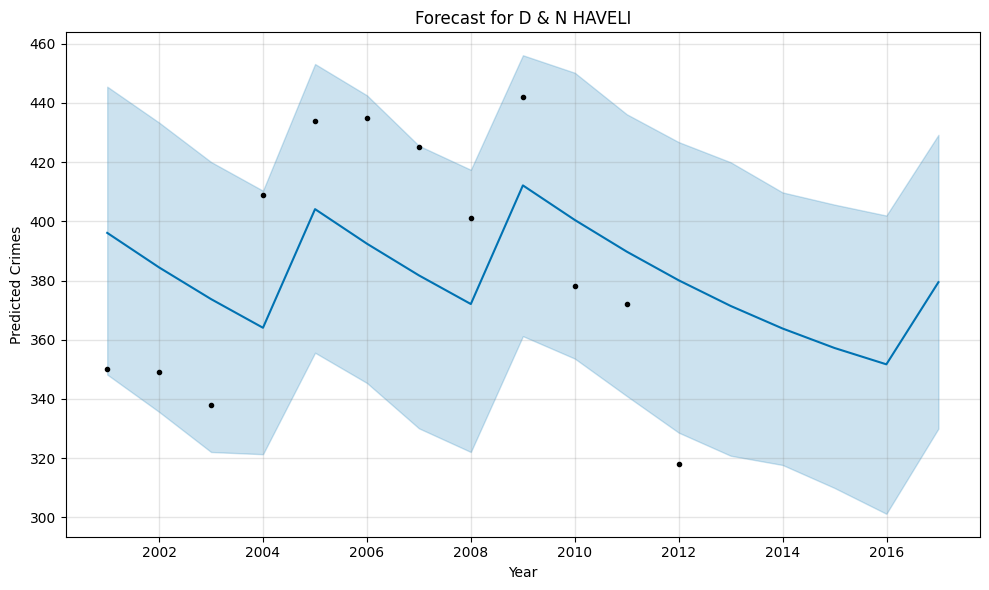

09:02:03 - cmdstanpy - INFO - Chain [1] start processing
09:02:03 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


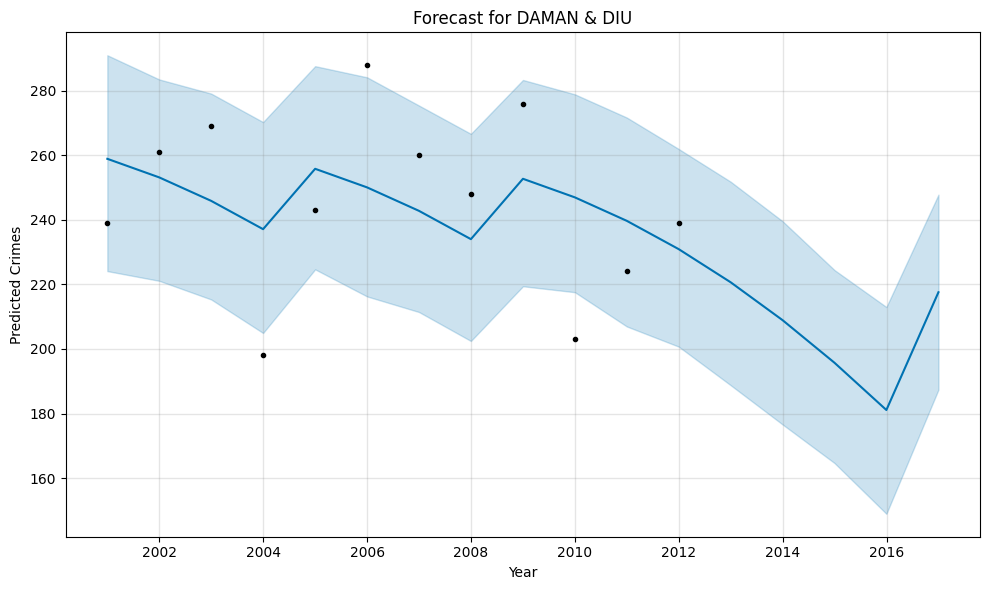

09:02:07 - cmdstanpy - INFO - Chain [1] start processing
09:02:07 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


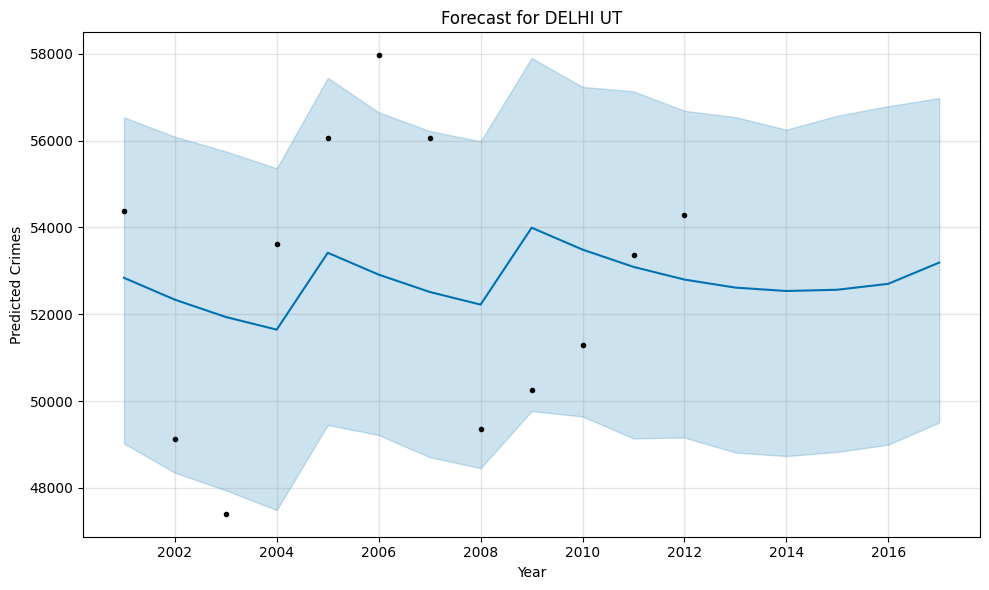

09:02:11 - cmdstanpy - INFO - Chain [1] start processing
09:02:12 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


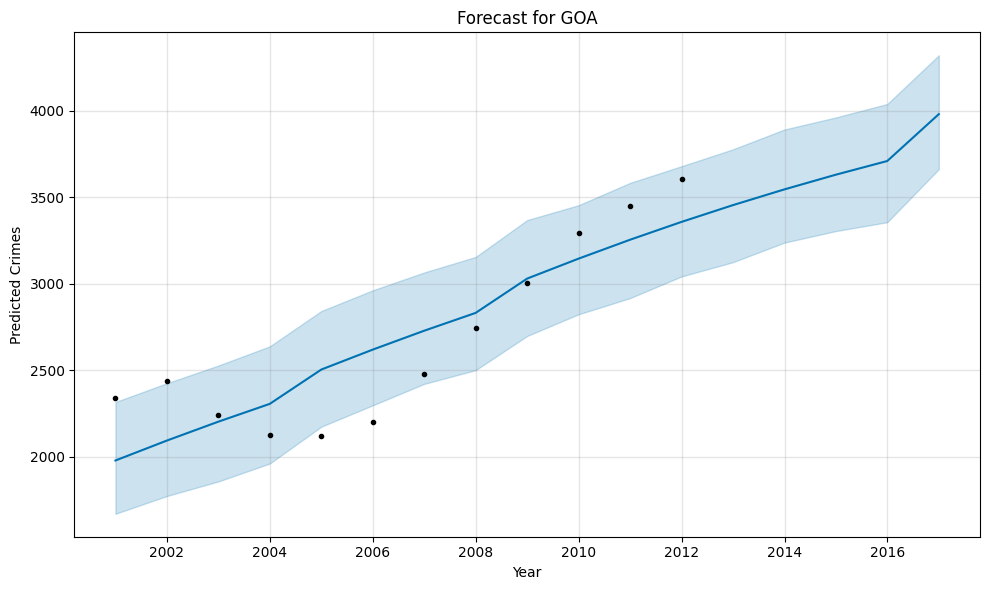

09:02:15 - cmdstanpy - INFO - Chain [1] start processing
09:02:16 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


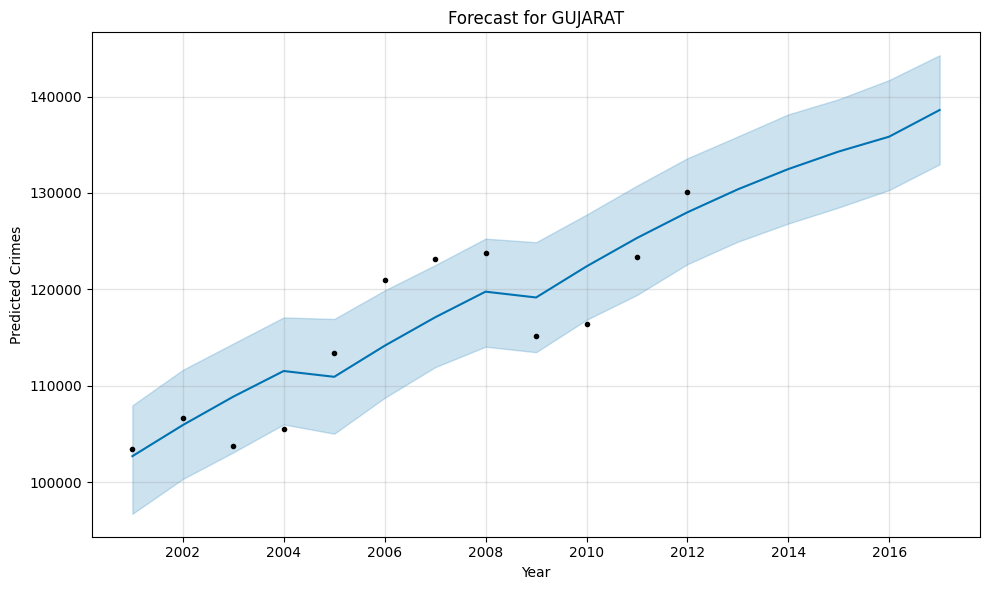

09:02:18 - cmdstanpy - INFO - Chain [1] start processing
09:02:18 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


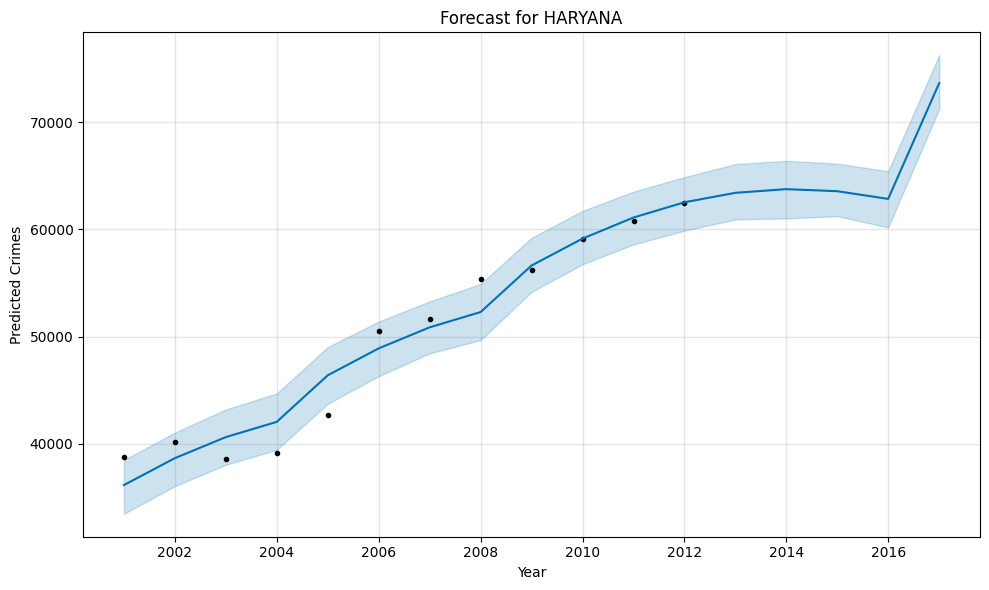

09:02:20 - cmdstanpy - INFO - Chain [1] start processing
09:02:20 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


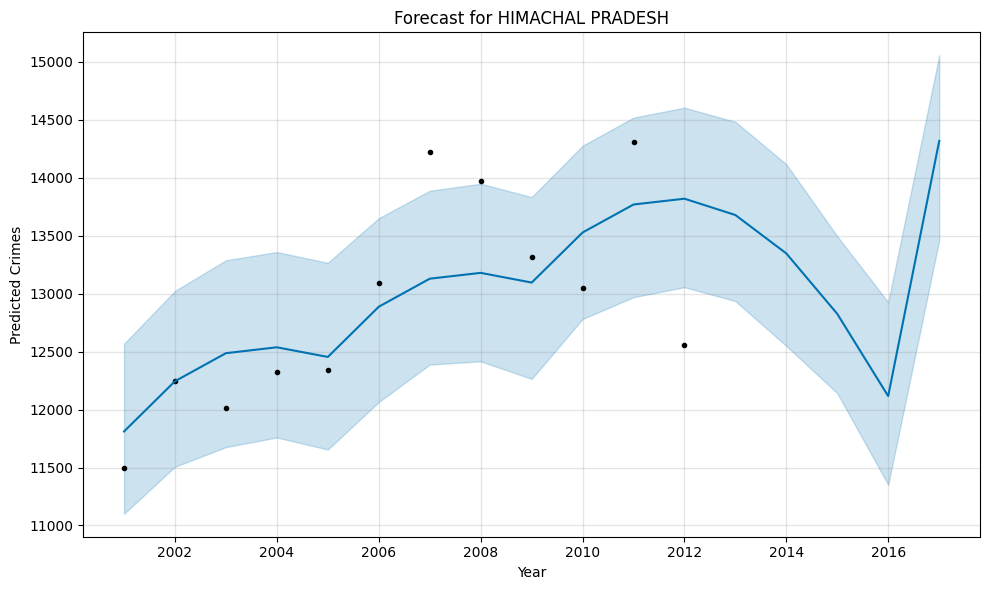

09:02:22 - cmdstanpy - INFO - Chain [1] start processing
09:02:23 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


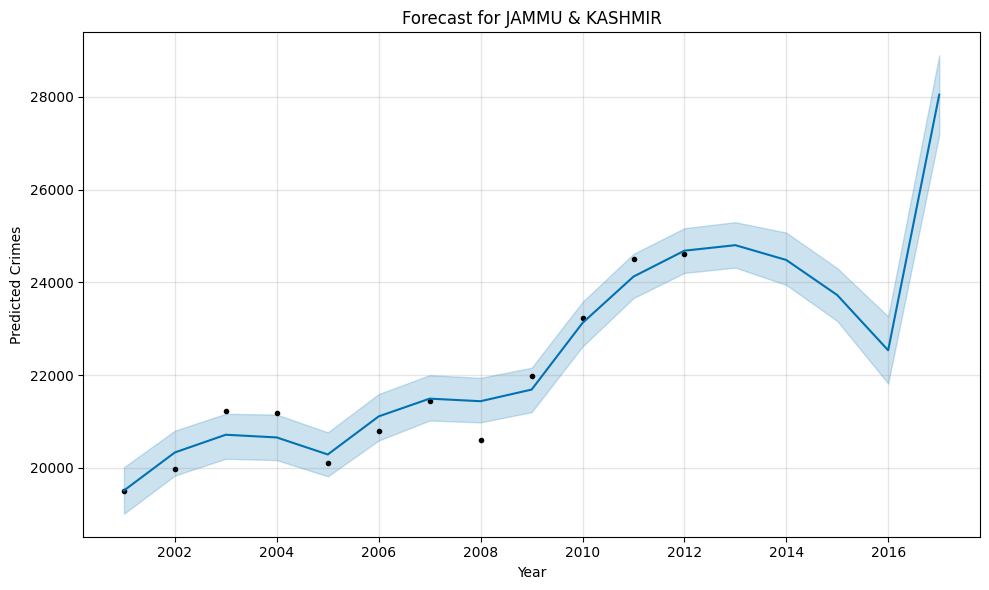

09:02:25 - cmdstanpy - INFO - Chain [1] start processing
09:02:26 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


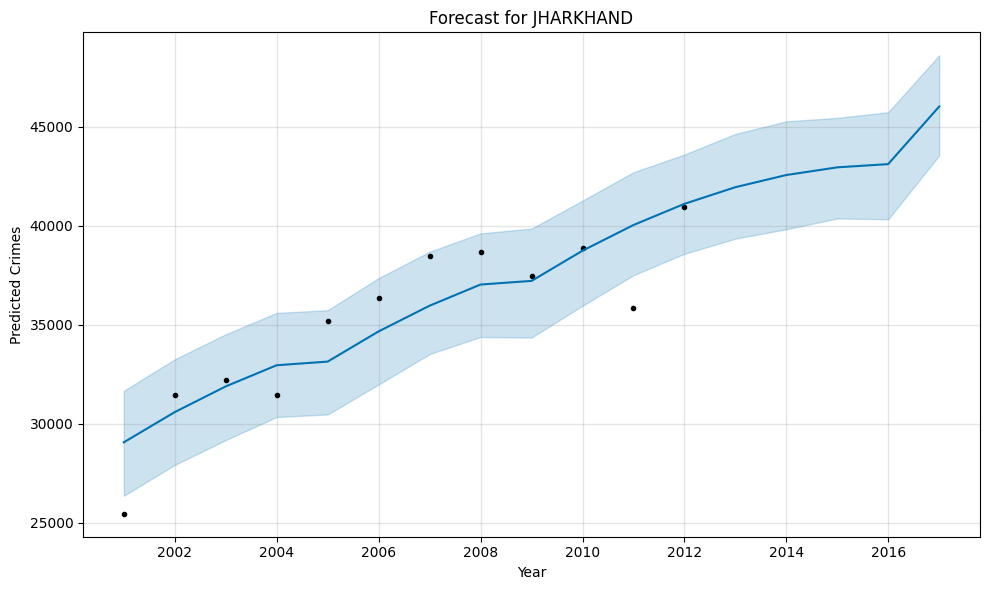

09:02:28 - cmdstanpy - INFO - Chain [1] start processing
09:02:28 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


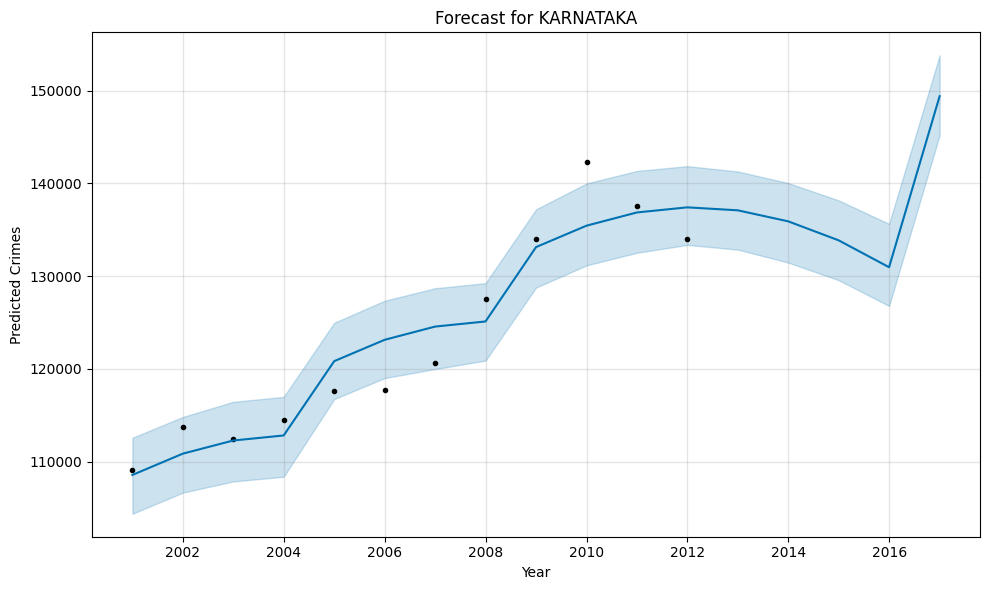

09:02:32 - cmdstanpy - INFO - Chain [1] start processing
09:02:33 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


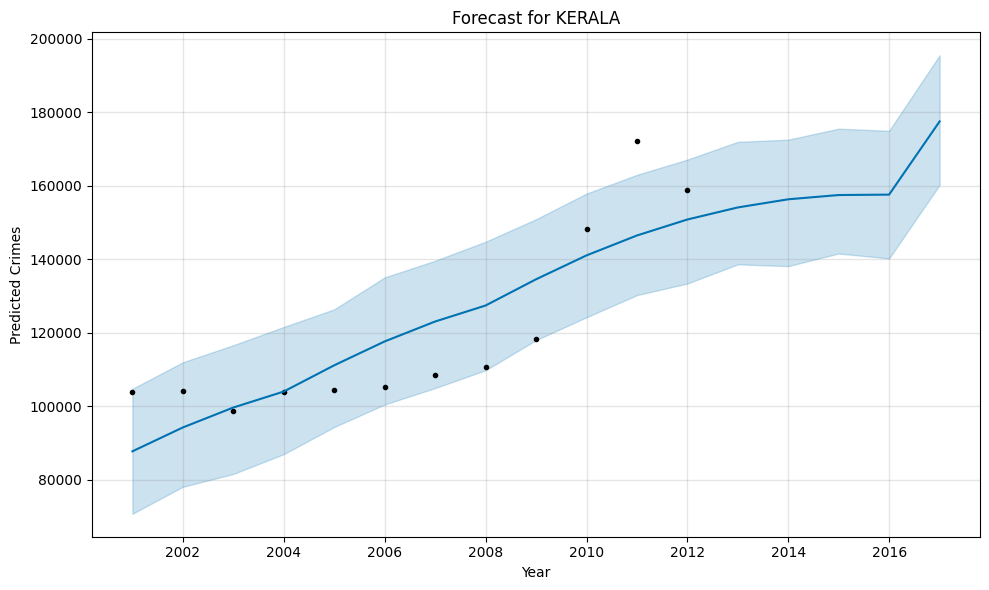

09:02:36 - cmdstanpy - INFO - Chain [1] start processing
09:02:37 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


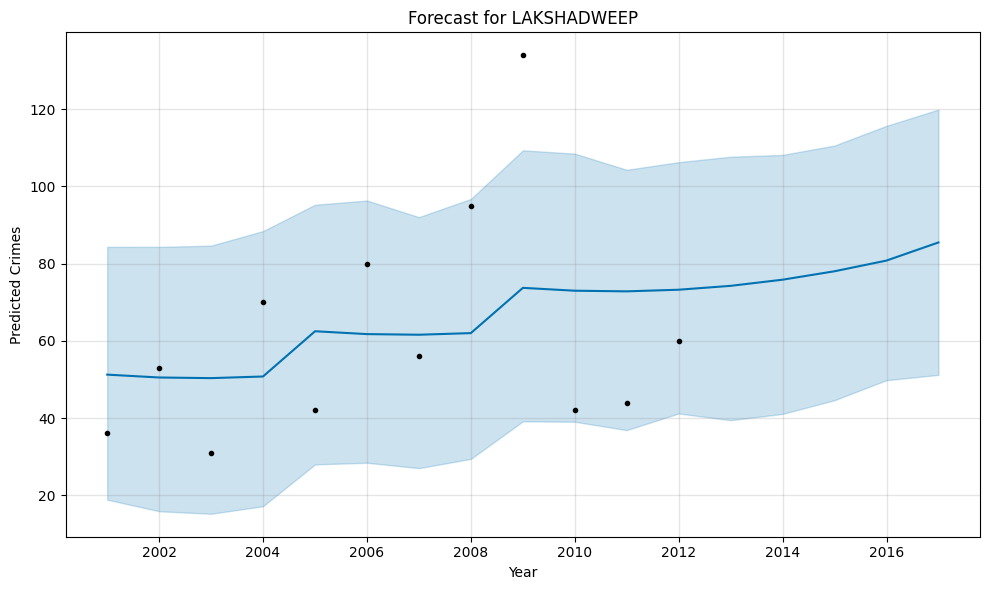

09:02:40 - cmdstanpy - INFO - Chain [1] start processing
09:02:41 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


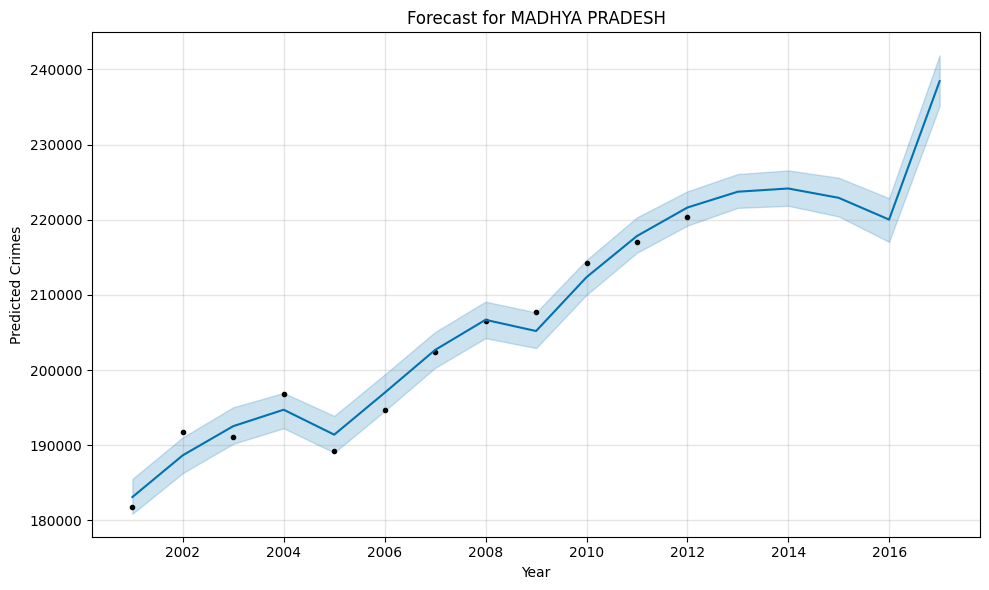

09:02:43 - cmdstanpy - INFO - Chain [1] start processing
09:02:43 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


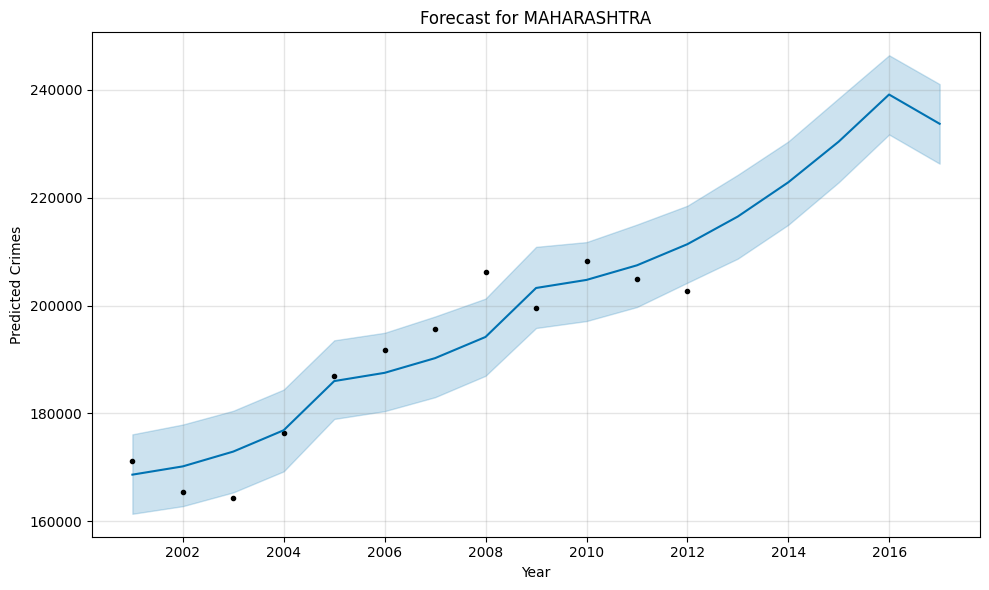

09:02:45 - cmdstanpy - INFO - Chain [1] start processing
09:02:46 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


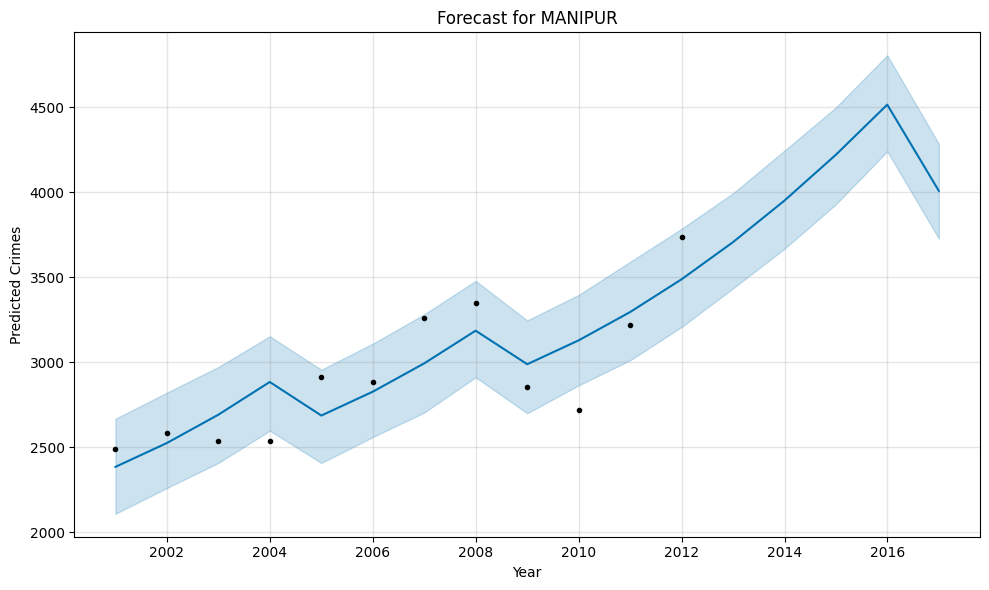

09:02:49 - cmdstanpy - INFO - Chain [1] start processing
09:02:50 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


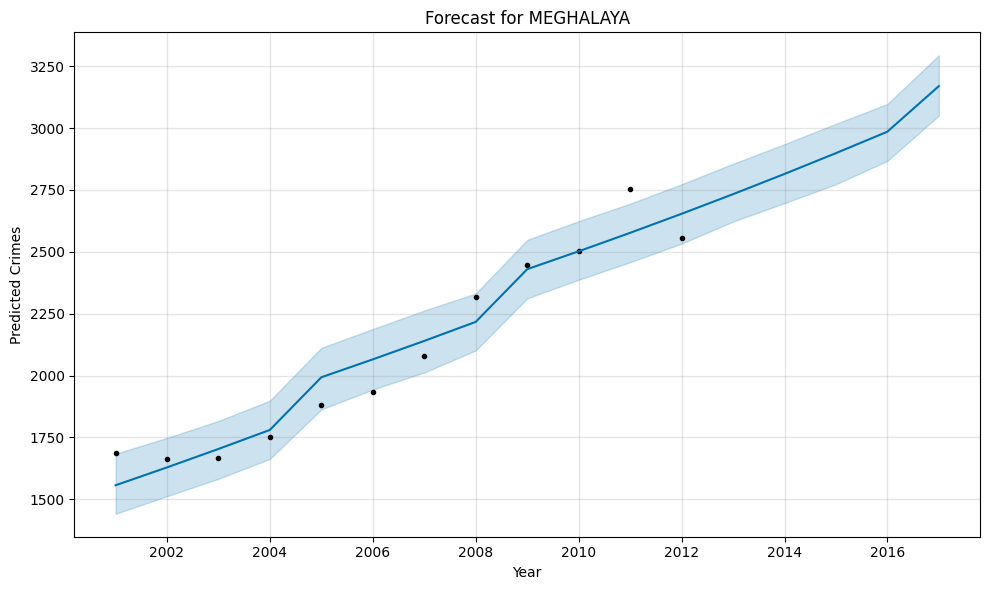

09:02:52 - cmdstanpy - INFO - Chain [1] start processing
09:02:52 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


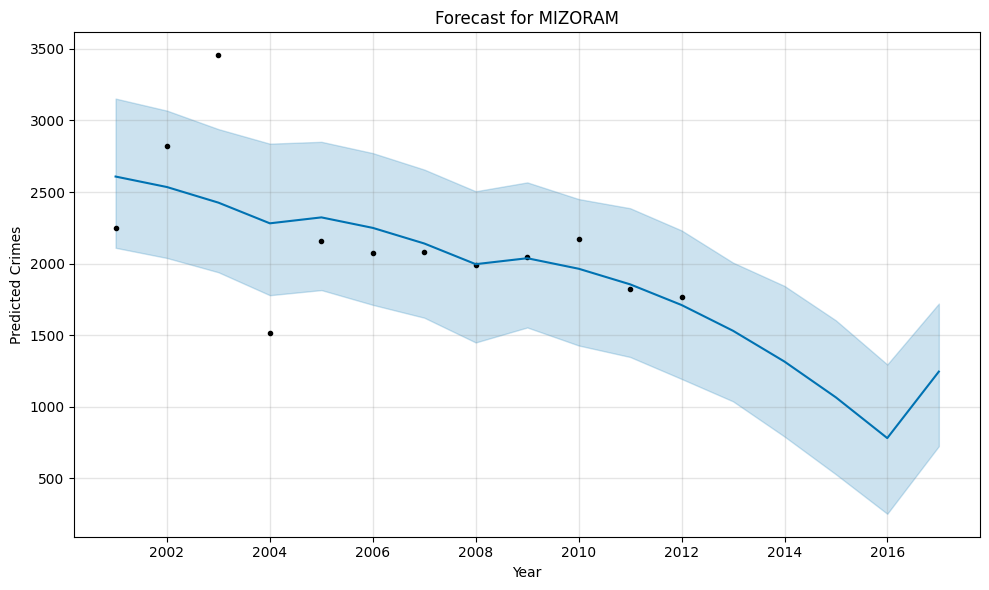

09:02:56 - cmdstanpy - INFO - Chain [1] start processing
09:02:57 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


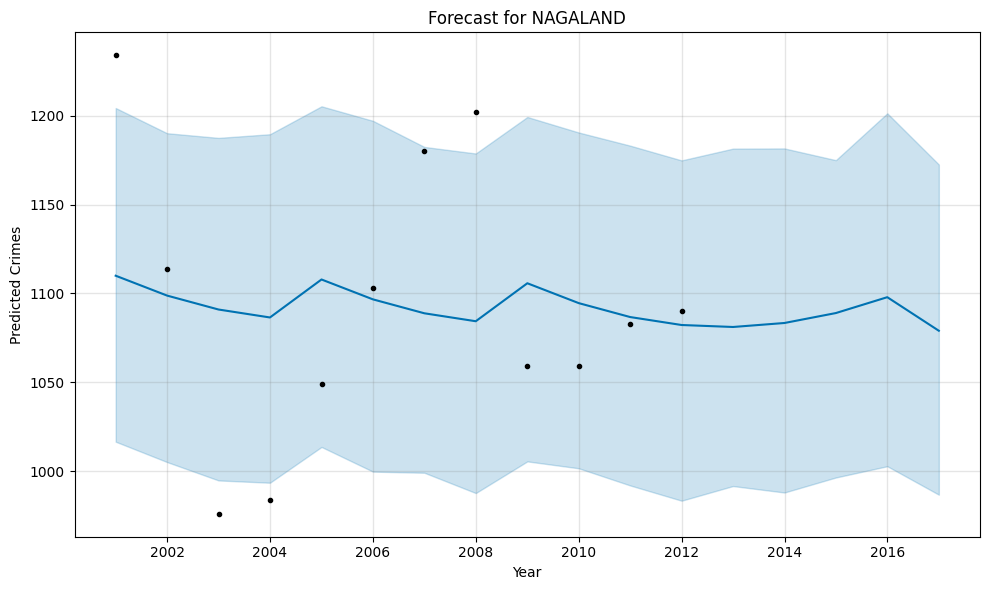

09:02:59 - cmdstanpy - INFO - Chain [1] start processing
09:02:59 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


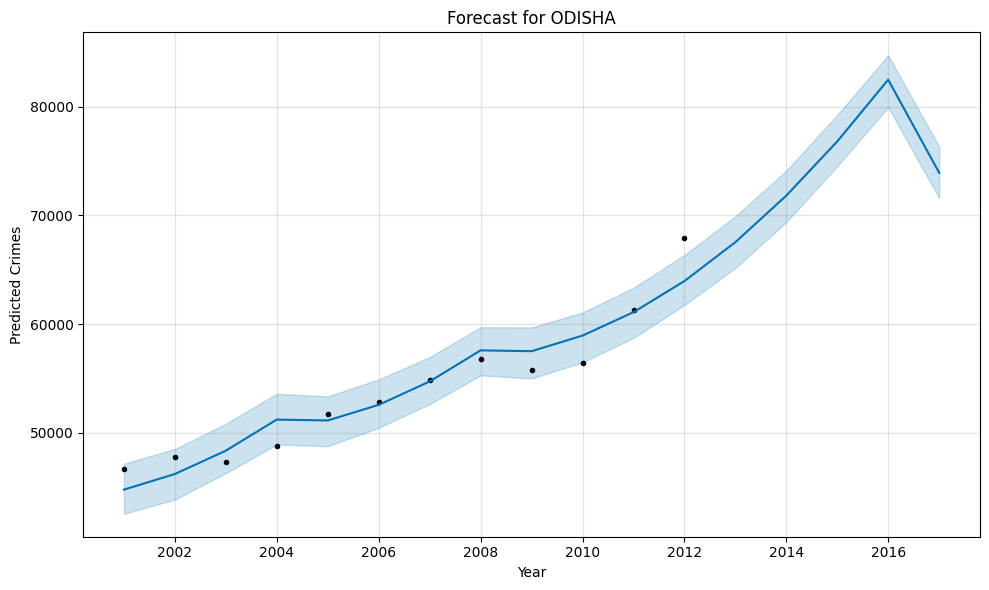

09:03:01 - cmdstanpy - INFO - Chain [1] start processing
09:03:02 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


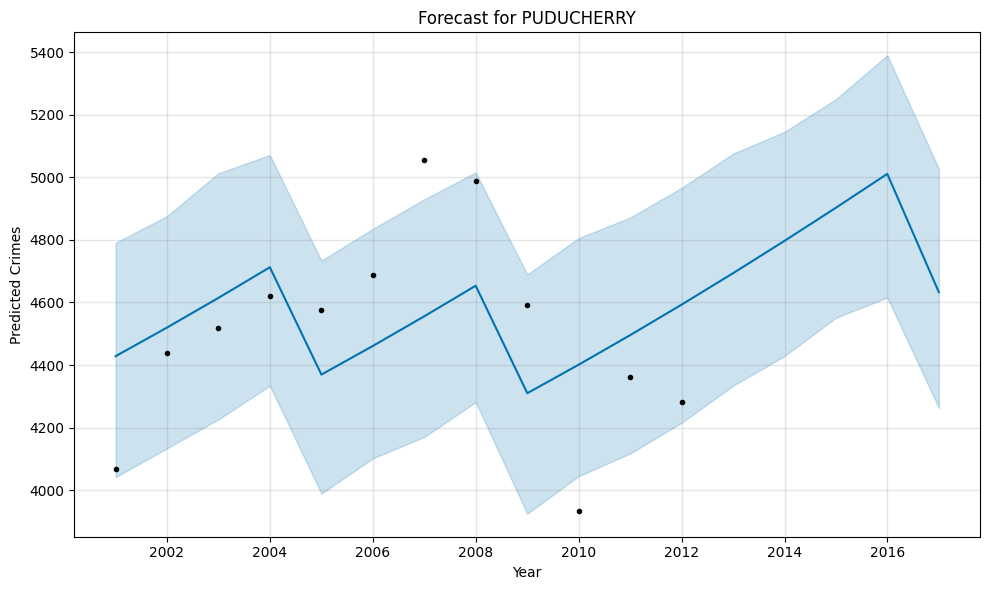

09:03:04 - cmdstanpy - INFO - Chain [1] start processing
09:03:05 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


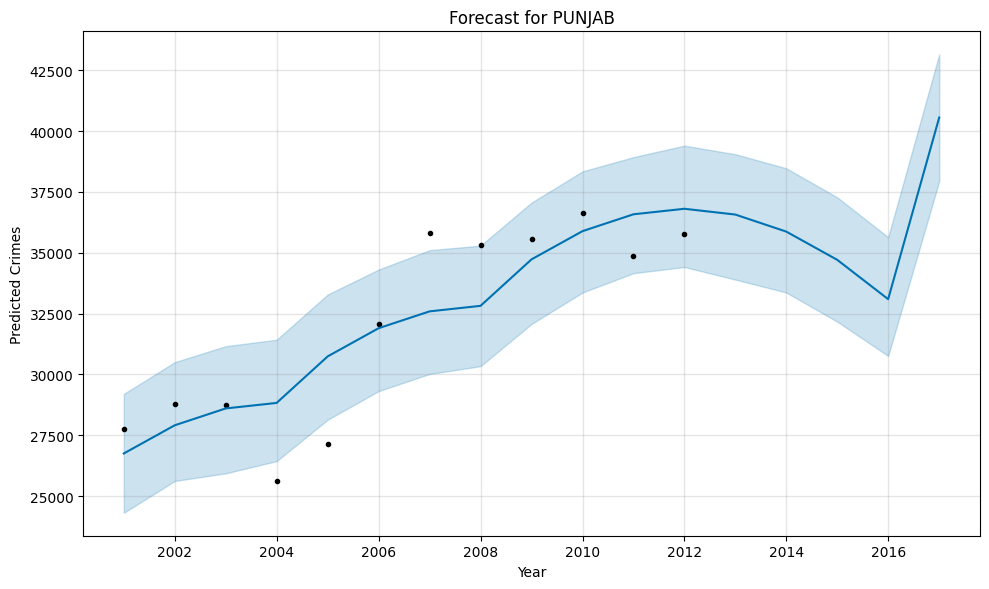

09:03:11 - cmdstanpy - INFO - Chain [1] start processing
09:03:12 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


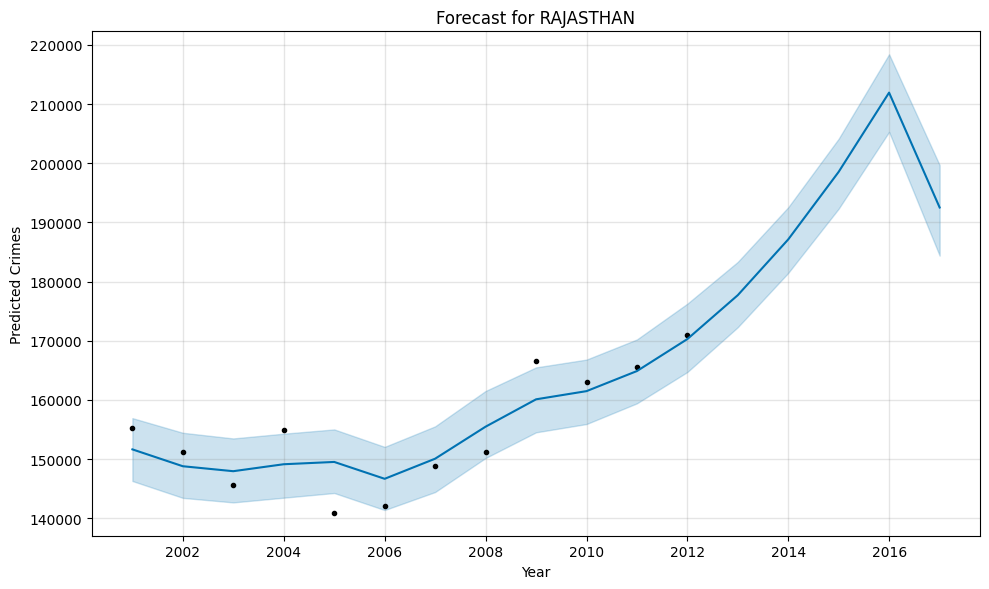

09:03:15 - cmdstanpy - INFO - Chain [1] start processing
09:03:17 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


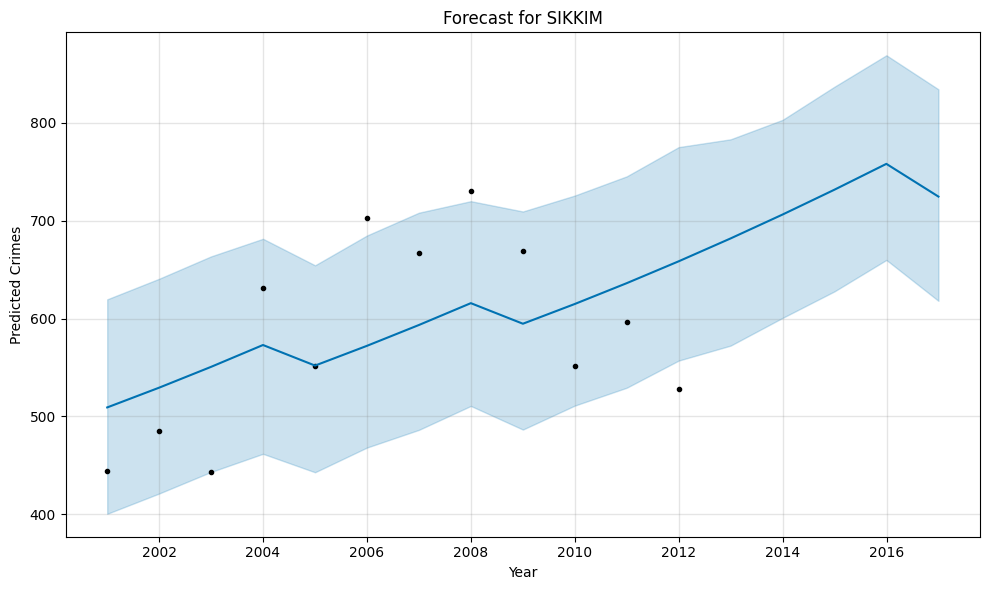

09:03:22 - cmdstanpy - INFO - Chain [1] start processing
09:03:23 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


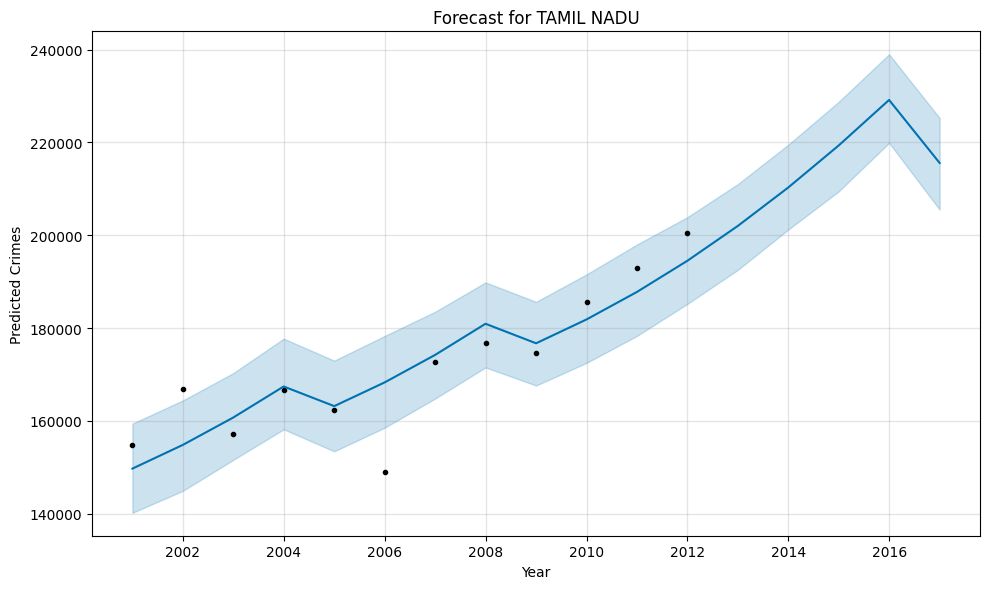

09:03:28 - cmdstanpy - INFO - Chain [1] start processing
09:03:30 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


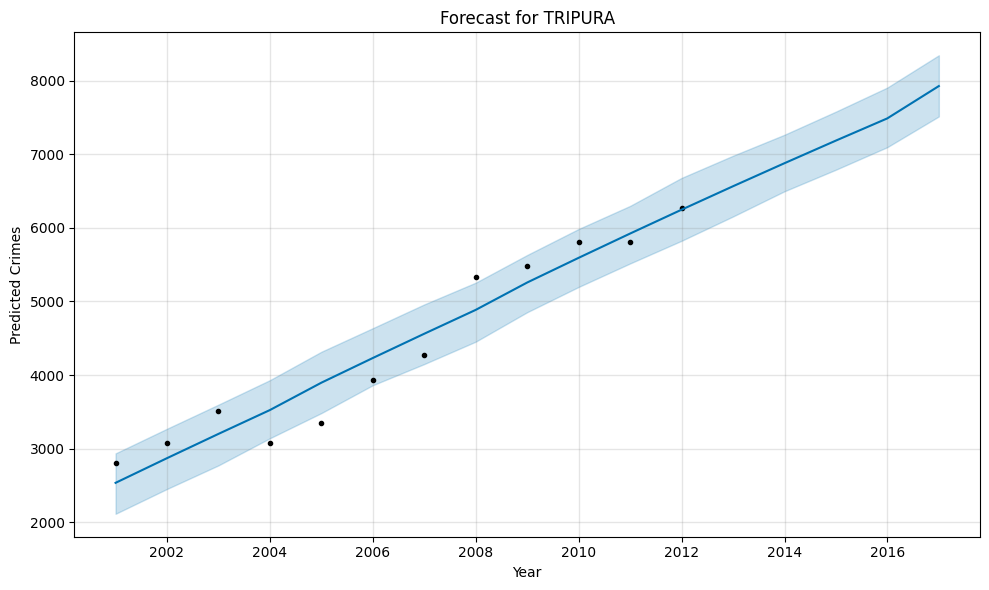

09:03:34 - cmdstanpy - INFO - Chain [1] start processing
09:03:36 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


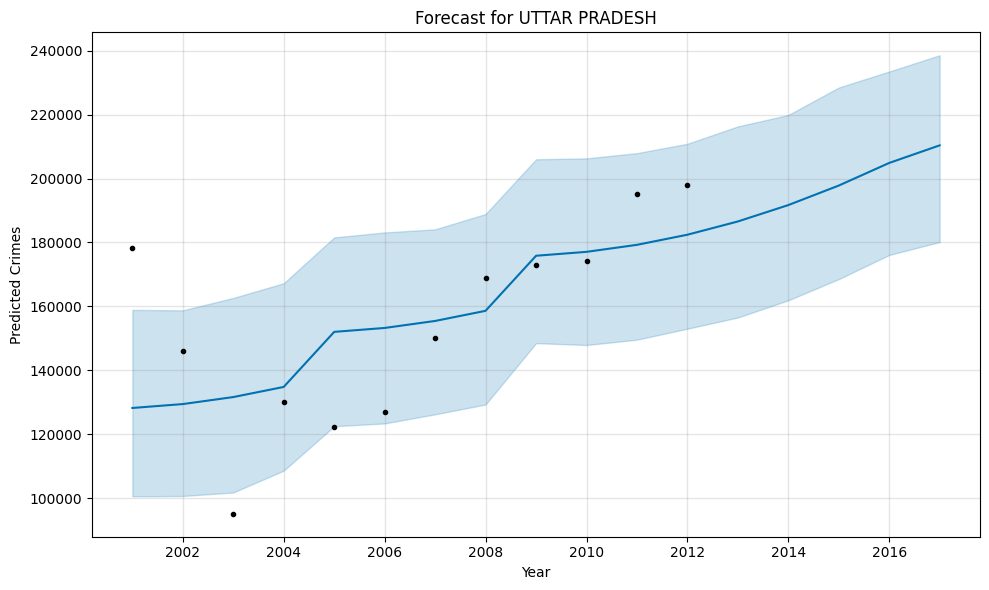

09:03:40 - cmdstanpy - INFO - Chain [1] start processing
09:03:41 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


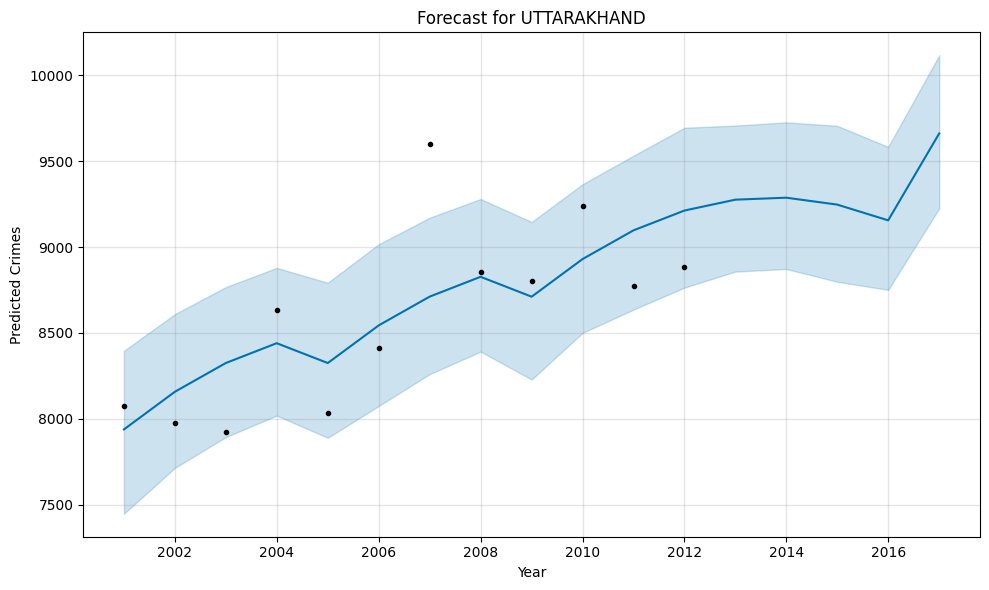

09:03:45 - cmdstanpy - INFO - Chain [1] start processing
09:03:46 - cmdstanpy - INFO - Chain [1] done processing
d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


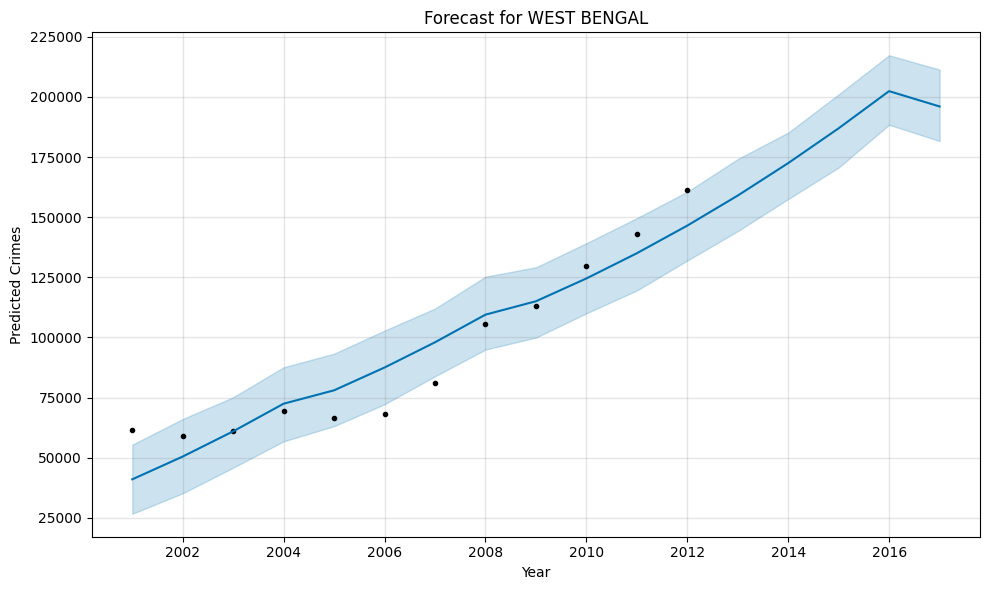

In [19]:

import pandas as pd
from prophet import Prophet
import joblib
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"D:\crime rate prediction\newtrial - Sheet 1 - 01_District_wise_crim 2.csv")
df = df[['YEAR', 'STATE/UT', 'TOTAL IPC CRIMES']]

# Clean the data
df.dropna(inplace=True)
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')

# Get unique states
states = df['STATE/UT'].unique()

# Save all models per state
for state in states:
    state_df = df[df['STATE/UT'] == state].groupby('YEAR')['TOTAL IPC CRIMES'].sum().reset_index()
    state_df.rename(columns={'YEAR': 'ds', 'TOTAL IPC CRIMES': 'y'}, inplace=True)

    # Train the Prophet model
    model = Prophet(yearly_seasonality=True)
    model.fit(state_df)

    # Save the trained model
    joblib.dump(model, f"prophet_model_{state.replace('/', '_')}.pkl")

    # Optional: visualize last trained forecast
    future = model.make_future_dataframe(periods=5, freq='Y')
    forecast = model.predict(future)
    
    model.plot(forecast)
    plt.title(f"Forecast for {state}")
    plt.xlabel("Year")
    plt.ylabel("Predicted Crimes")
    plt.tight_layout()
    plt.show()

df = df[['YEAR', 'STATE/UT', 'TOTAL IPC CRIMES']]

# Clean the data
df.dropna(inplace=True)
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')

# Get unique states
states = df['STATE/UT'].unique()

# Save all models per state
for state in states:
    state_df = df[df['STATE/UT'] == state].groupby('YEAR')['TOTAL IPC CRIMES'].sum().reset_index()
    state_df.rename(columns={'YEAR': 'ds', 'TOTAL IPC CRIMES': 'y'}, inplace=True)

    # Train the Prophet model
    model = Prophet(yearly_seasonality=True)
    model.fit(state_df)

    # Save the trained model
    joblib.dump(model, f"prophet_model_{state.replace('/', '_')}.pkl")

    # Optional: visualize last trained forecast
    future = model.make_future_dataframe(periods=5, freq='Y')
    forecast = model.predict(future)
    
    model.plot(forecast)
    plt.title(f"Forecast for {state}")
    plt.xlabel("Year")
    plt.ylabel("Predicted Crimes")
    plt.tight_layout()
    plt.show()


14:55:39 - cmdstanpy - INFO - Chain [1] start processing
14:55:39 - cmdstanpy - INFO - Chain [1] done processing
14:55:40 - cmdstanpy - INFO - Chain [1] start processing
14:55:40 - cmdstanpy - INFO - Chain [1] done processing
14:55:41 - cmdstanpy - INFO - Chain [1] start processing
14:55:41 - cmdstanpy - INFO - Chain [1] done processing
14:55:41 - cmdstanpy - INFO - Chain [1] start processing
14:55:42 - cmdstanpy - INFO - Chain [1] done processing
14:55:42 - cmdstanpy - INFO - Chain [1] start processing
14:55:43 - cmdstanpy - INFO - Chain [1] done processing
14:55:43 - cmdstanpy - INFO - Chain [1] start processing
14:55:43 - cmdstanpy - INFO - Chain [1] done processing
14:55:44 - cmdstanpy - INFO - Chain [1] start processing
14:55:44 - cmdstanpy - INFO - Chain [1] done processing
14:55:44 - cmdstanpy - INFO - Chain [1] start processing
14:55:45 - cmdstanpy - INFO - Chain [1] done processing
14:55:45 - cmdstanpy - INFO - Chain [1] start processing
14:55:46 - cmdstanpy - INFO - Chain [1]

 Saved all state Prophet models into 'prophet_model_all_states.pkl'


d:\MLFLOW1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


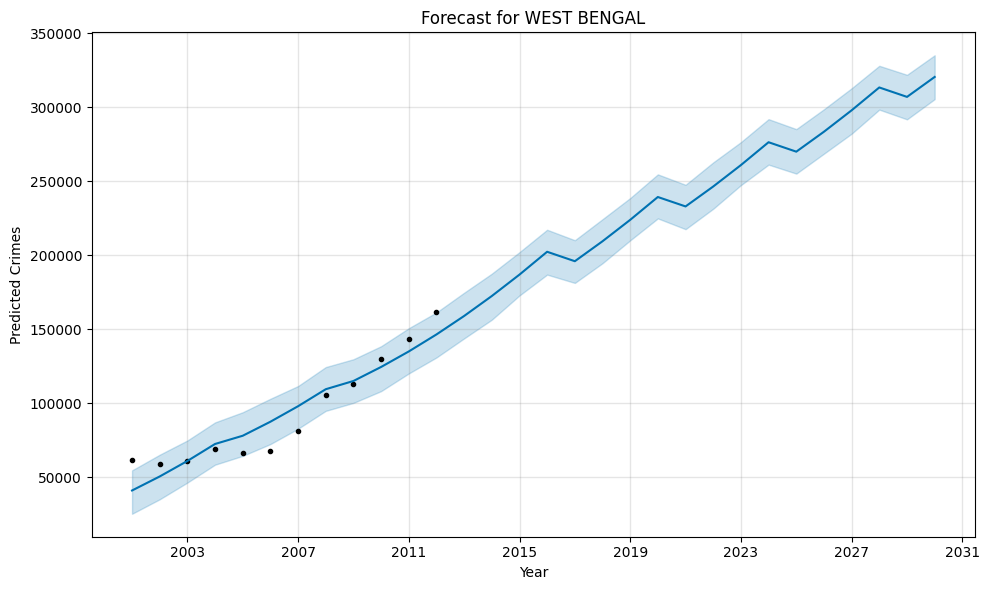

In [18]:
import pandas as pd
from prophet import Prophet
import joblib
import os

# Load dataset
df = pd.read_csv(r"D:\crime rate prediction\newtrial - Sheet 1 - 01_District_wise_crim 2.csv")
df = df[['YEAR', 'STATE/UT', 'TOTAL IPC CRIMES']]

# Clean data
df.dropna(inplace=True)
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')

# Get unique states
states = df['STATE/UT'].unique()

# Create a dictionary to store models for each state
state_models = {}

# Train a separate model for each state
for state in states:
    state_df = df[df['STATE/UT'] == state]
    state_grouped = state_df.groupby('YEAR')['TOTAL IPC CRIMES'].sum().reset_index()
    state_grouped.rename(columns={'YEAR': 'ds', 'TOTAL IPC CRIMES': 'y'}, inplace=True)

    # Train Prophet model
    model = Prophet(yearly_seasonality=True)
    model.fit(state_grouped)

    # Save model in dictionary
    state_models[state] = model

# Save all models into a single pickle file
joblib.dump(state_models, "prophet_model_all_states.pkl")
print(" Saved all state Prophet models into 'prophet_model_all_states.pkl'")


future = model.make_future_dataframe(periods=18, freq='Y')
forecast = model.predict(future)
    
model.plot(forecast)
plt.title(f"Forecast for {state}")
plt.xlabel("Year")
plt.ylabel("Predicted Crimes")
plt.tight_layout()
plt.show()